## Data Visualization with ggplot2

The ability to produce meaningful and beautiful data visualizations is an essential part of skill set as a data scientist. 

- `ggplot2` is the go-to tool for flexible and professional plots in R. 
- examine the three essential layers for making a plot - Data, Aesthetics and Geometries. 
- Calculate statistics and see how Coordinates and Facets aid in communication. 
- Make a custom plotting function to explore a large data set, combining statistics and excellent visuals.

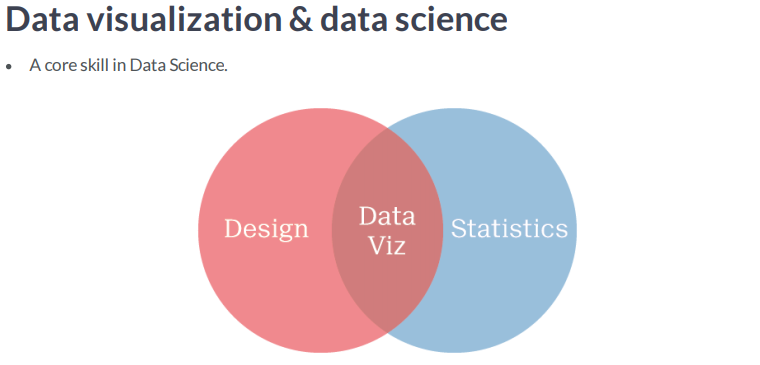

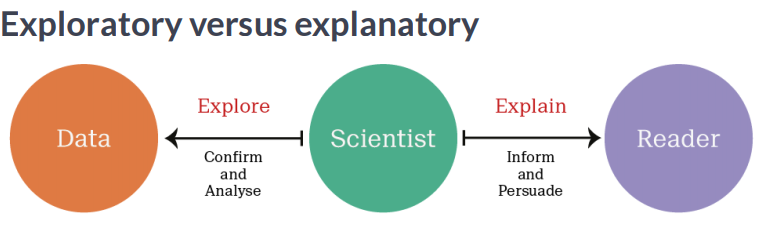

### 1. Introduction


In [1]:
# Load the ggplot2 package
library(ggplot2)
library(repr)
options(repr.plot.width=15, repr.plot.height=6)
library(car)

Loading required package: carData



'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


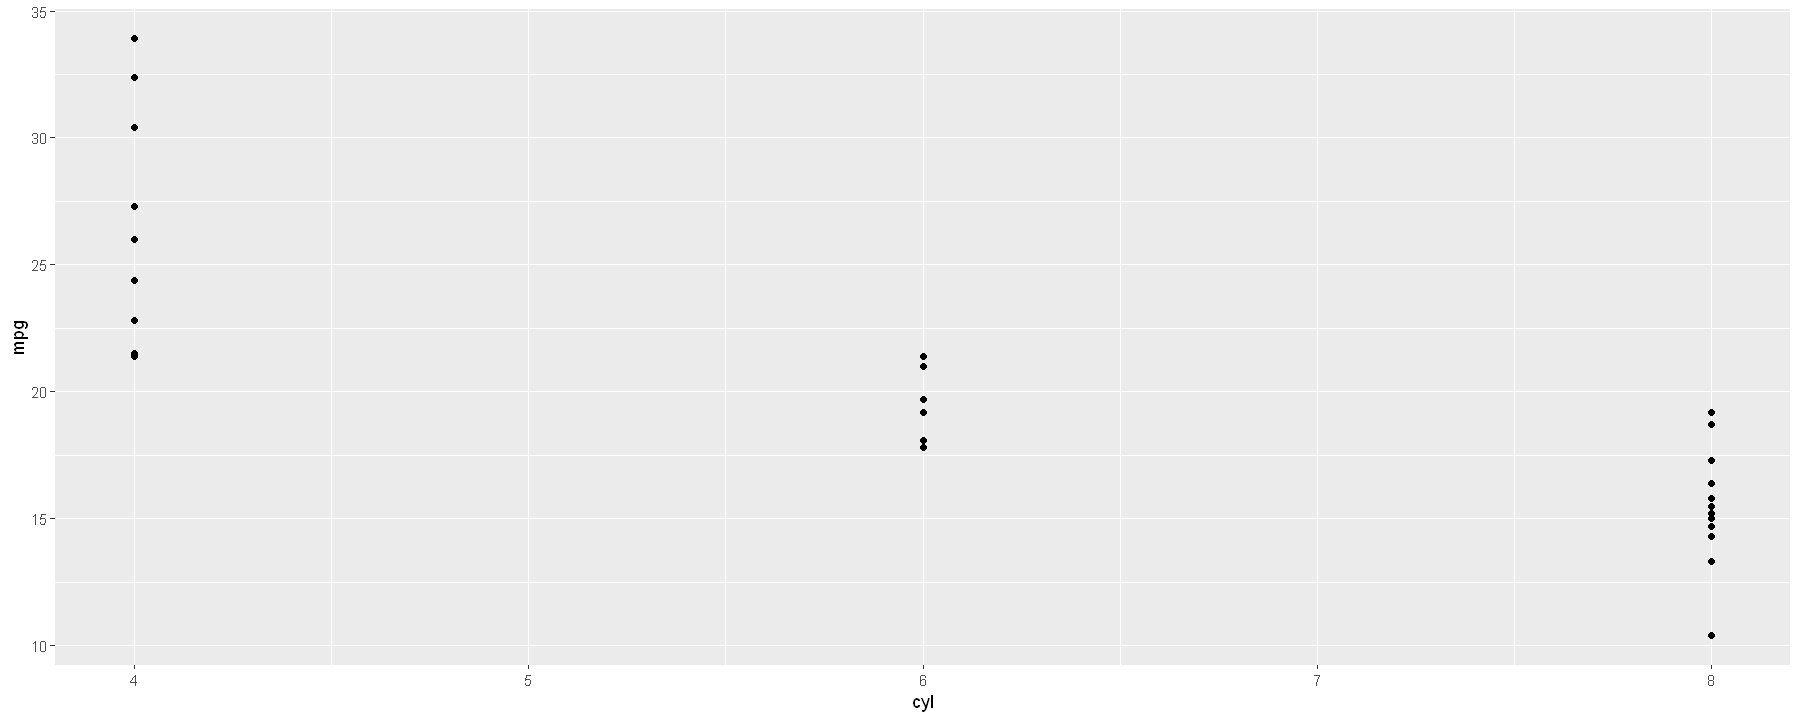

In [2]:
# Explore the mtcars data frame with str()
str(mtcars)

# Execute the following command
ggplot(mtcars, aes(cyl, mpg)) +
  geom_point()

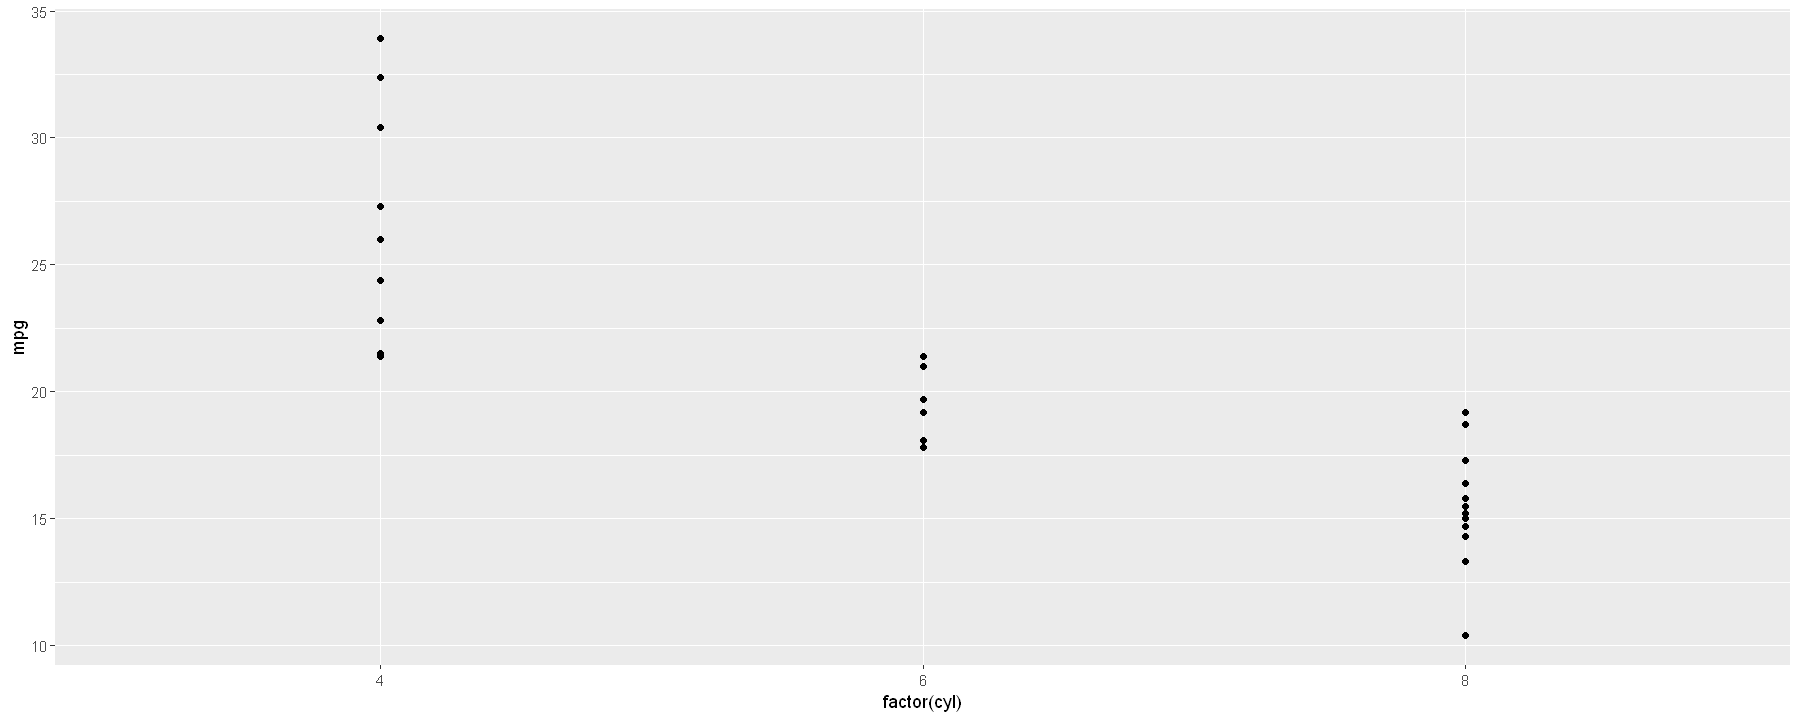

In [3]:
# Change the command below so that cyl is treated as factor
ggplot(mtcars, aes(factor(cyl), mpg)) + 
  geom_point()

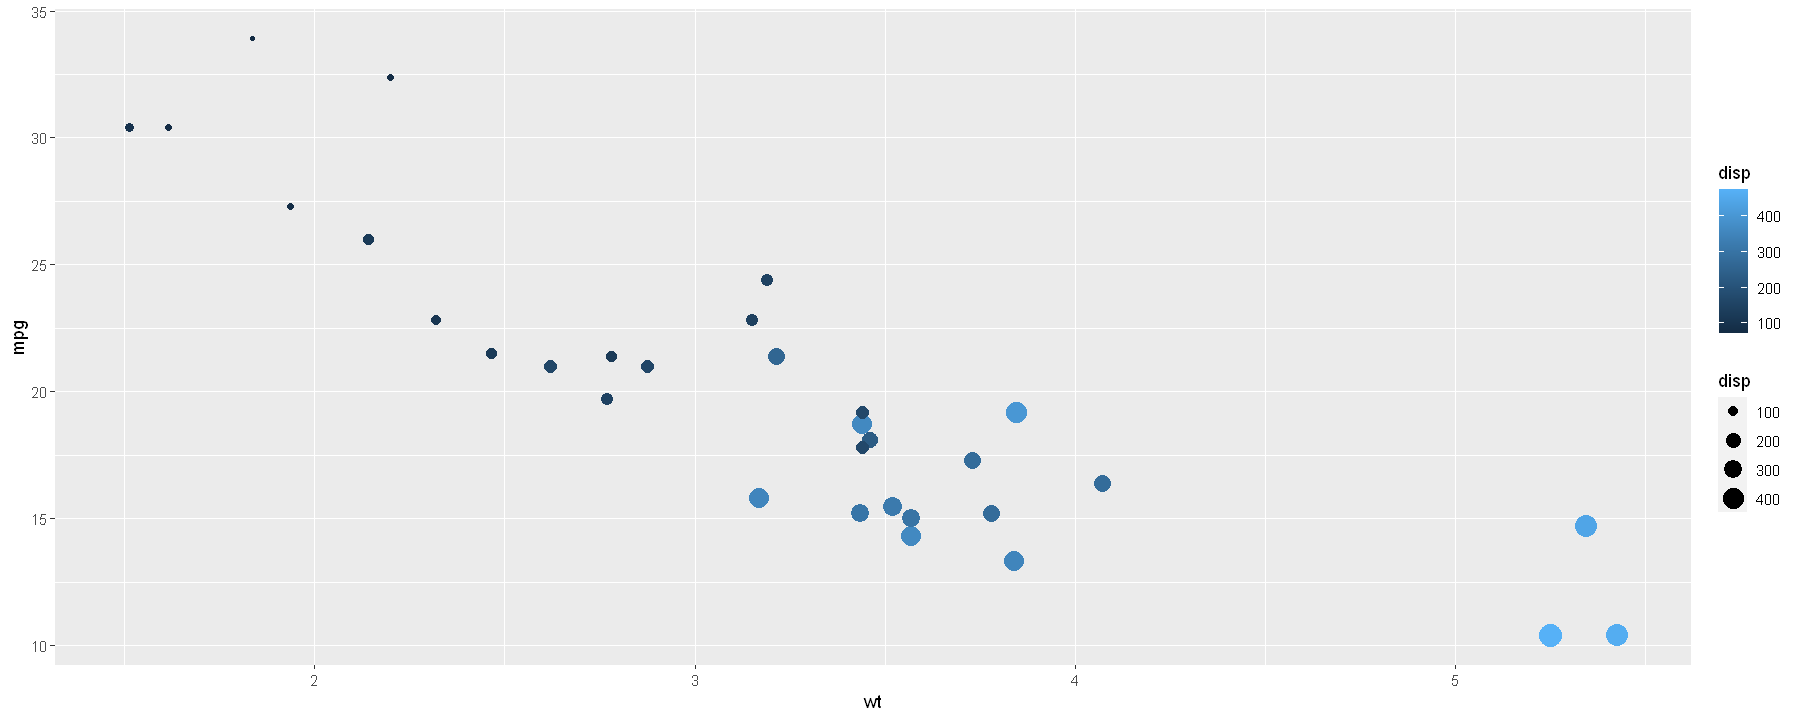

In [4]:
# Change the color aesthetic to a size aesthetic
ggplot(mtcars, aes(wt, mpg, color = disp, size=disp)) +
  geom_point()

In [5]:
str(diamonds)

Classes 'tbl_df', 'tbl' and 'data.frame':	53940 obs. of  10 variables:
 $ carat  : num  0.23 0.21 0.23 0.29 0.31 0.24 0.24 0.26 0.22 0.23 ...
 $ cut    : Ord.factor w/ 5 levels "Fair"<"Good"<..: 5 4 2 4 2 3 3 3 1 3 ...
 $ color  : Ord.factor w/ 7 levels "D"<"E"<"F"<"G"<..: 2 2 2 6 7 7 6 5 2 5 ...
 $ clarity: Ord.factor w/ 8 levels "I1"<"SI2"<"SI1"<..: 2 3 5 4 2 6 7 3 4 5 ...
 $ depth  : num  61.5 59.8 56.9 62.4 63.3 62.8 62.3 61.9 65.1 59.4 ...
 $ table  : num  55 61 65 58 58 57 57 55 61 61 ...
 $ price  : int  326 326 327 334 335 336 336 337 337 338 ...
 $ x      : num  3.95 3.89 4.05 4.2 4.34 3.94 3.95 4.07 3.87 4 ...
 $ y      : num  3.98 3.84 4.07 4.23 4.35 3.96 3.98 4.11 3.78 4.05 ...
 $ z      : num  2.43 2.31 2.31 2.63 2.75 2.48 2.47 2.53 2.49 2.39 ...


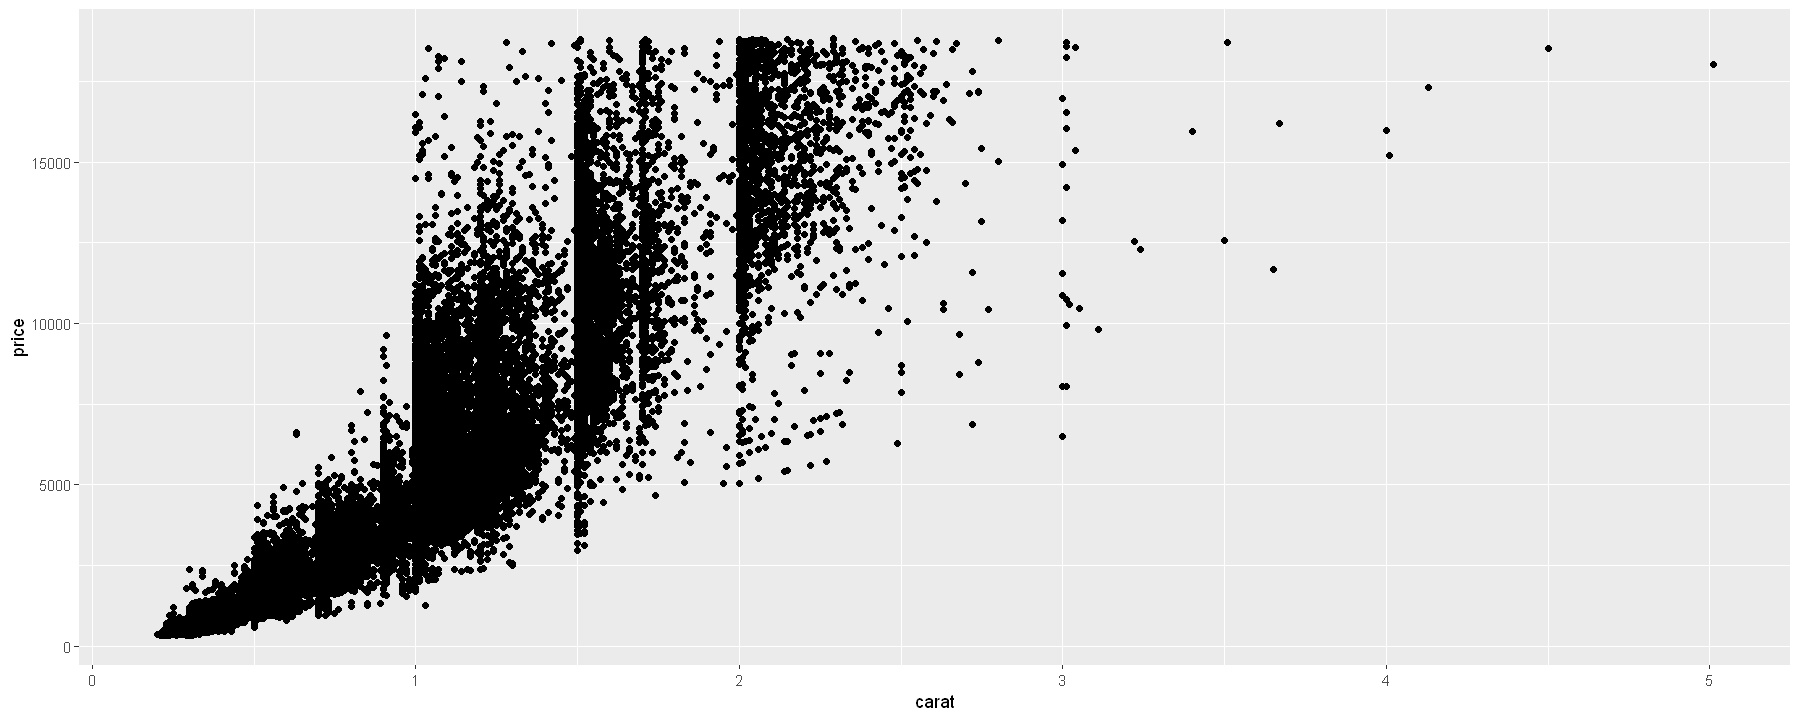

In [6]:
# Add geom_smooth() with +
ggplot(diamonds, aes(carat, price)) +
  geom_point()

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



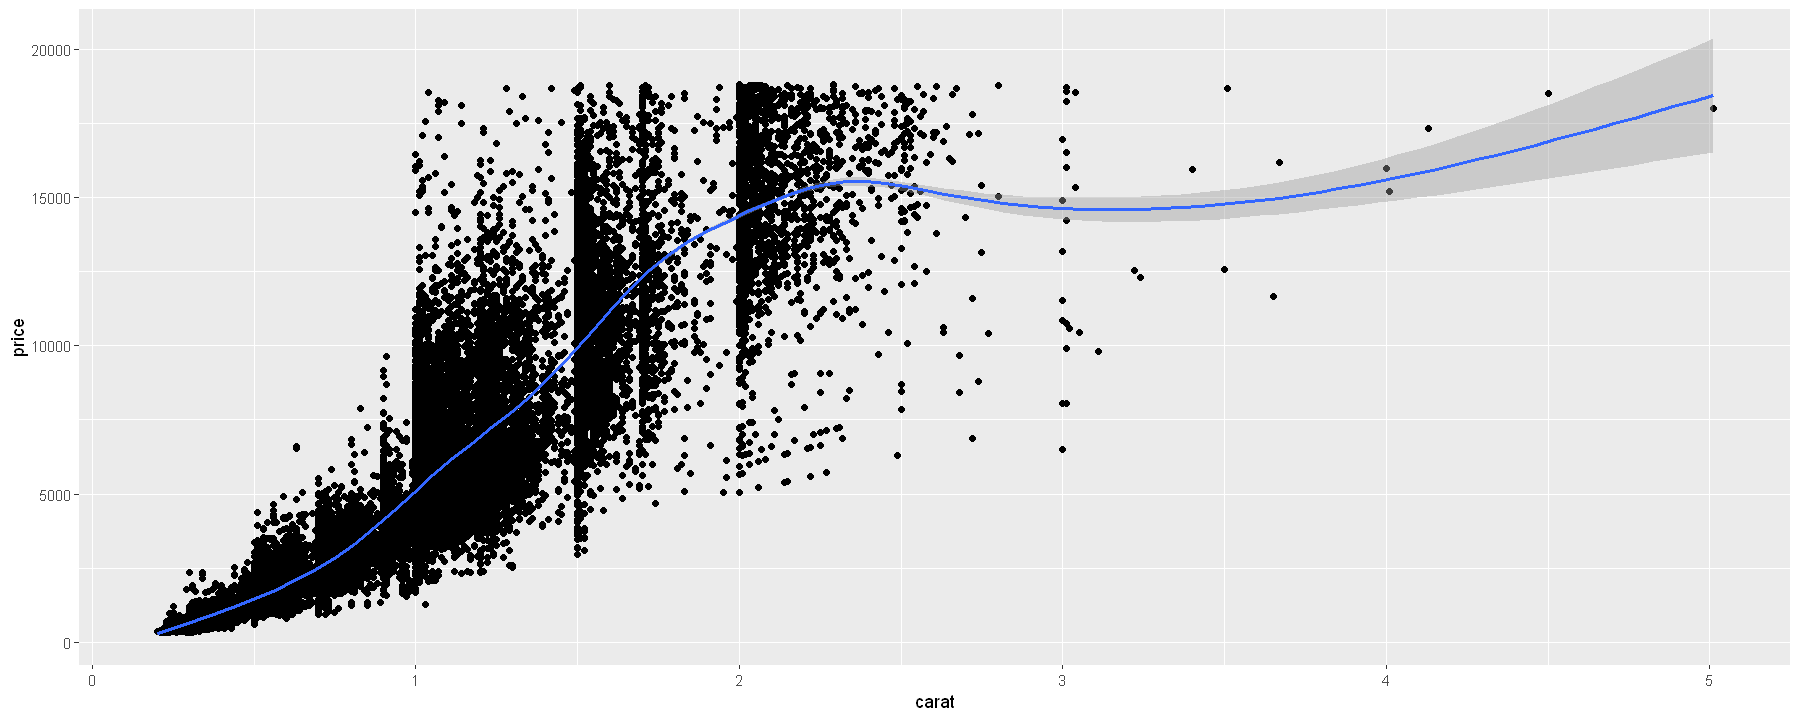

In [7]:
# Add geom_smooth() with +
ggplot(diamonds, aes(carat, price)) +
  geom_point() + geom_smooth()

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



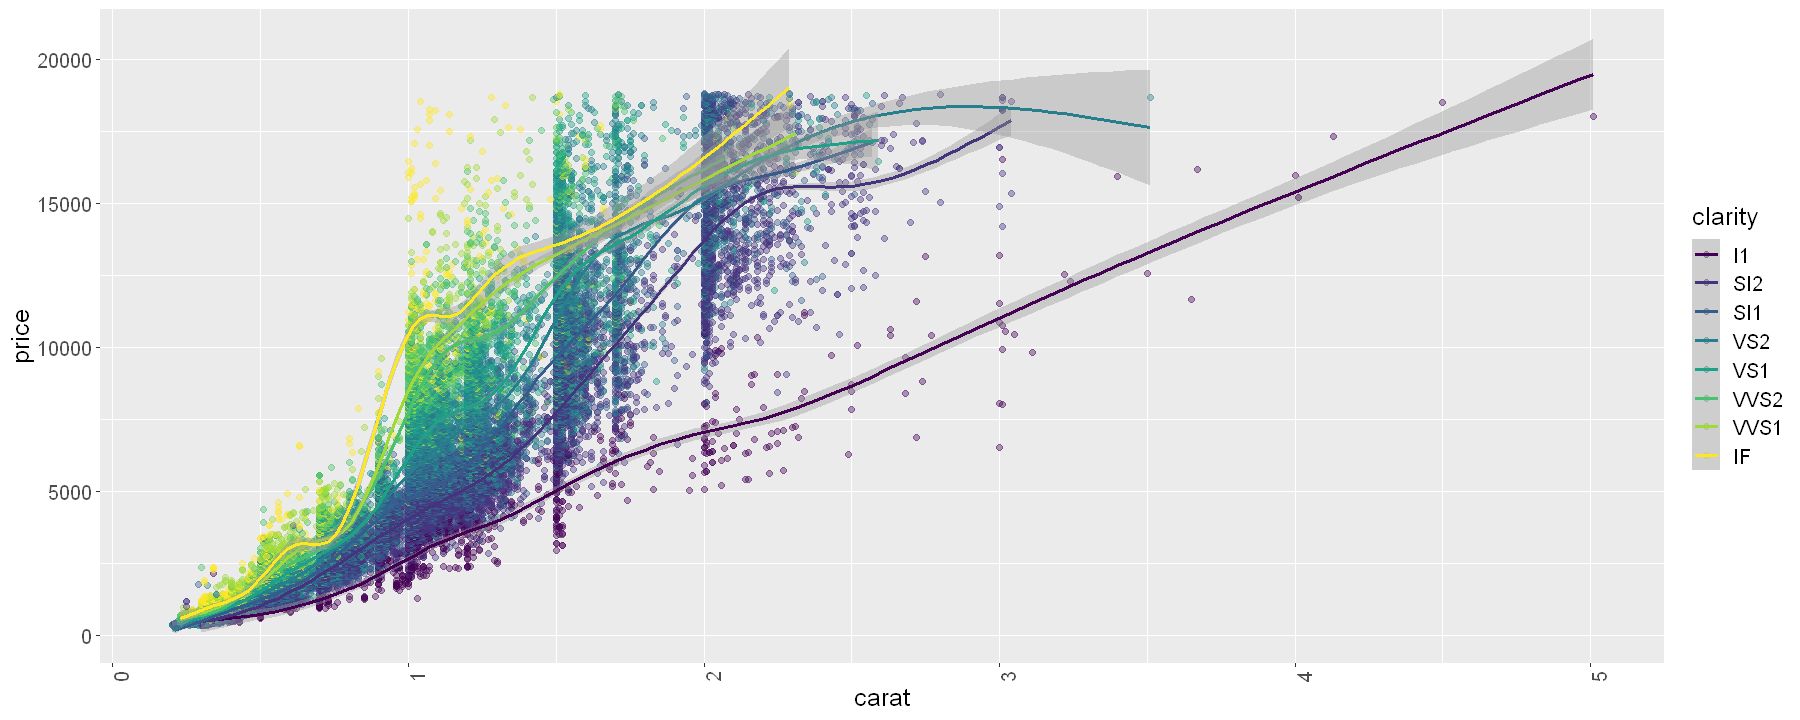

In [8]:

# Make the points 40% opaque
ggplot(diamonds, aes(carat, price, color = clarity)) +
  geom_point(alpha=0.4) +
  geom_smooth()+
theme(text = element_text(size=15),
        axis.text.x = element_text(angle=90, hjust=1))

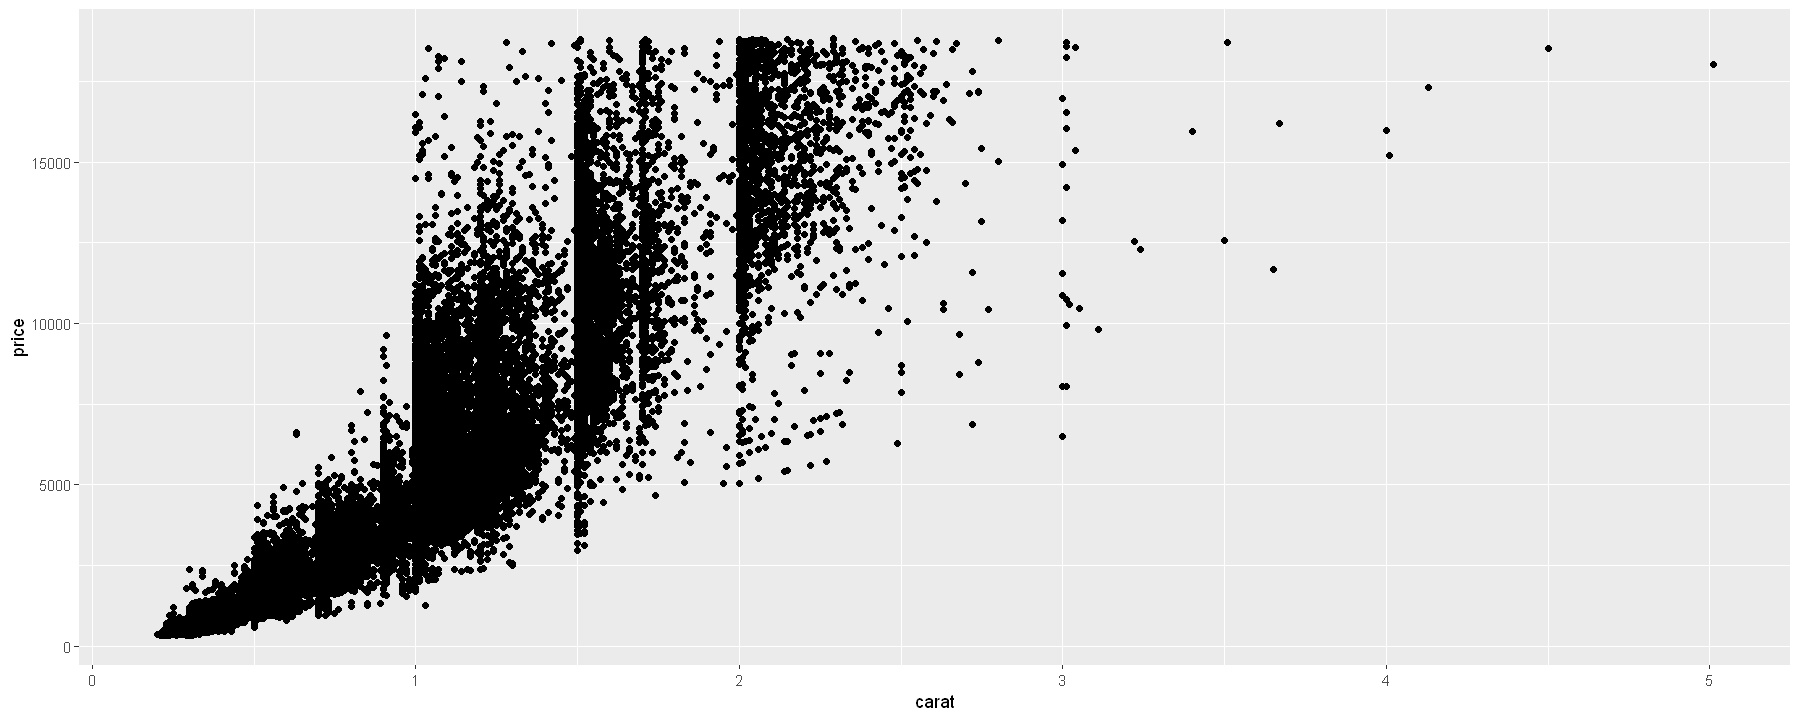

In [9]:
# Draw a ggplot
plt_price_vs_carat <- ggplot(
  # Use the diamonds dataset
  diamonds,
  # For the aesthetics, map x to carat and y to price
  aes(carat, price)
)

# Add a point layer to plt_price_vs_carat
 plt_price_vs_carat+ geom_point()

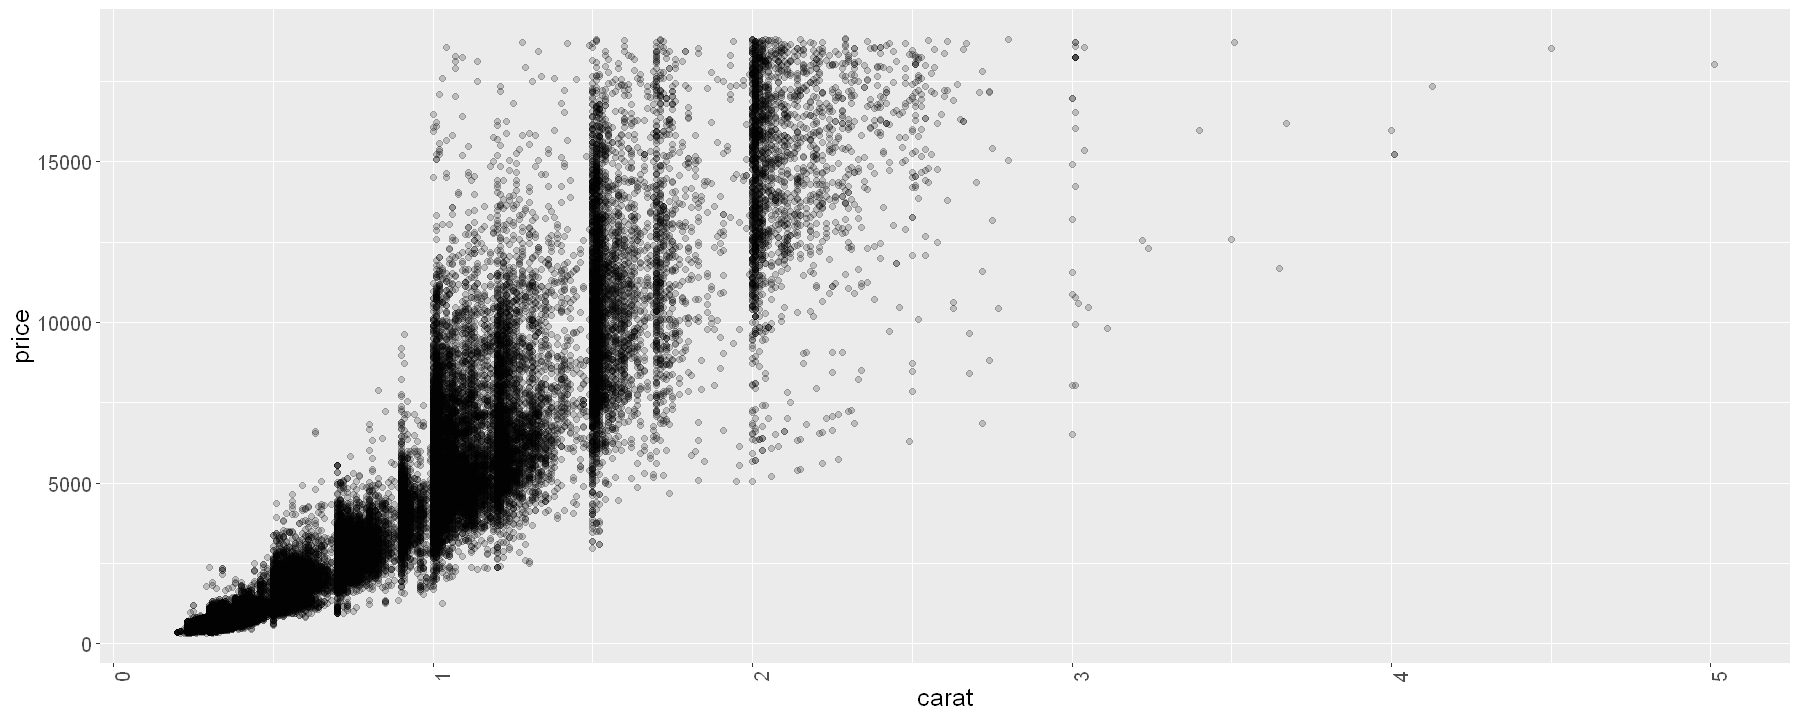

In [10]:
# From previous step
plt_price_vs_carat <- ggplot(diamonds, aes(carat, price))

# Edit this to make points 20% opaque: plt_price_vs_carat_transparent
plt_price_vs_carat_transparent <- plt_price_vs_carat + geom_point(alpha=0.2)+theme(text = element_text(size=15),
        axis.text.x = element_text(angle=90, hjust=1))

# See the plot
plt_price_vs_carat_transparent

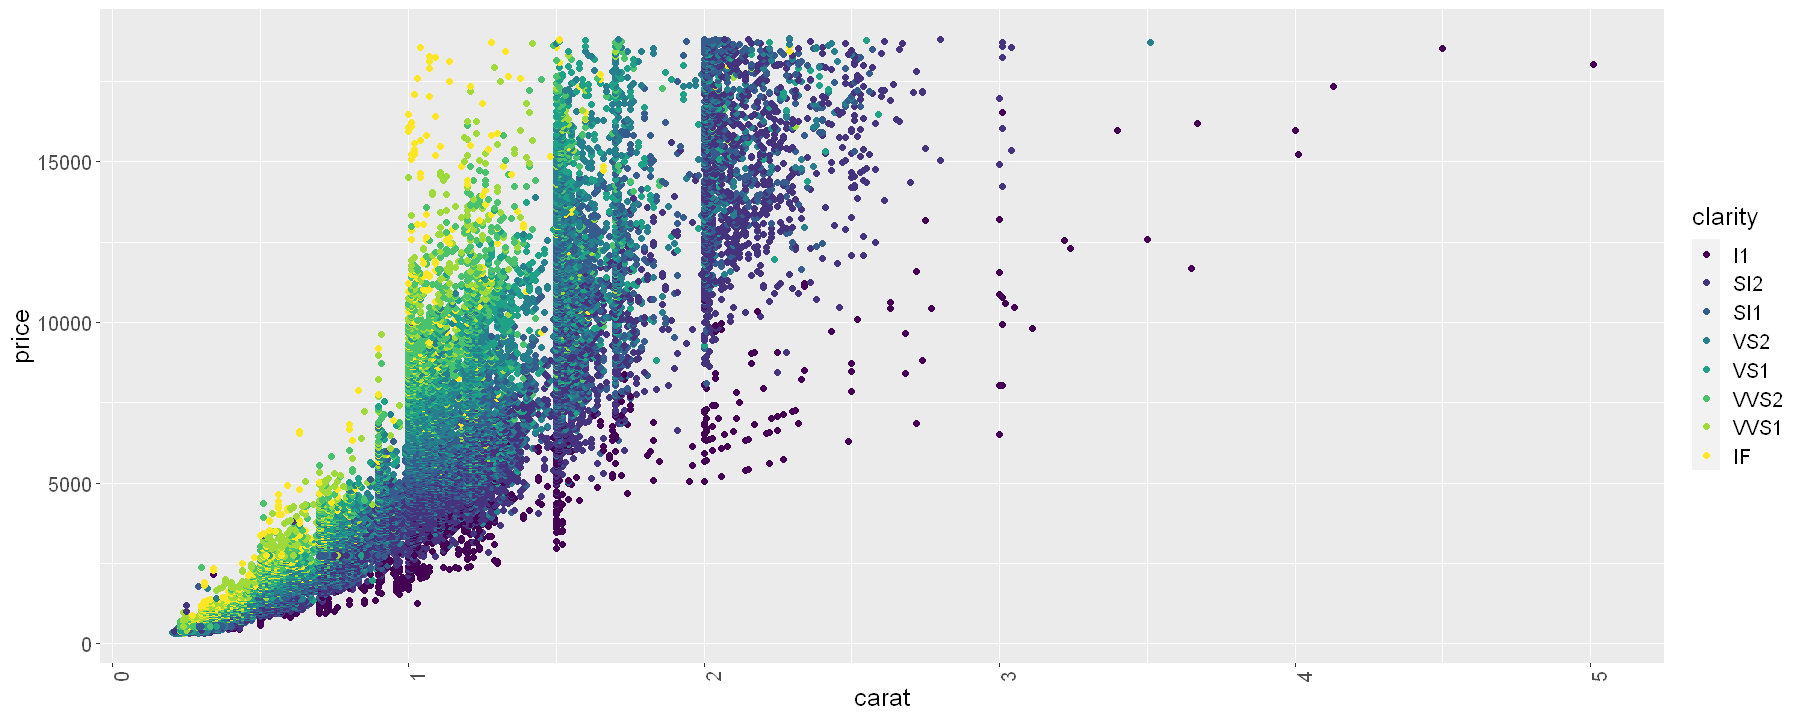

In [11]:
# From previous step
plt_price_vs_carat <- ggplot(diamonds, aes(carat, price))

# Edit this to map color to clarity,
# Assign the updated plot to a new object
plt_price_vs_carat_by_clarity <- plt_price_vs_carat + geom_point(aes(color=clarity)) + theme(text = element_text(size=15),
        axis.text.x = element_text(angle=90, hjust=1))

# See the plot
plt_price_vs_carat_by_clarity

### 2. Aesthetics
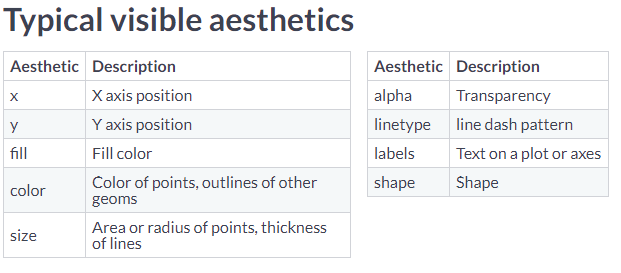

In [12]:
str(mtcars)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


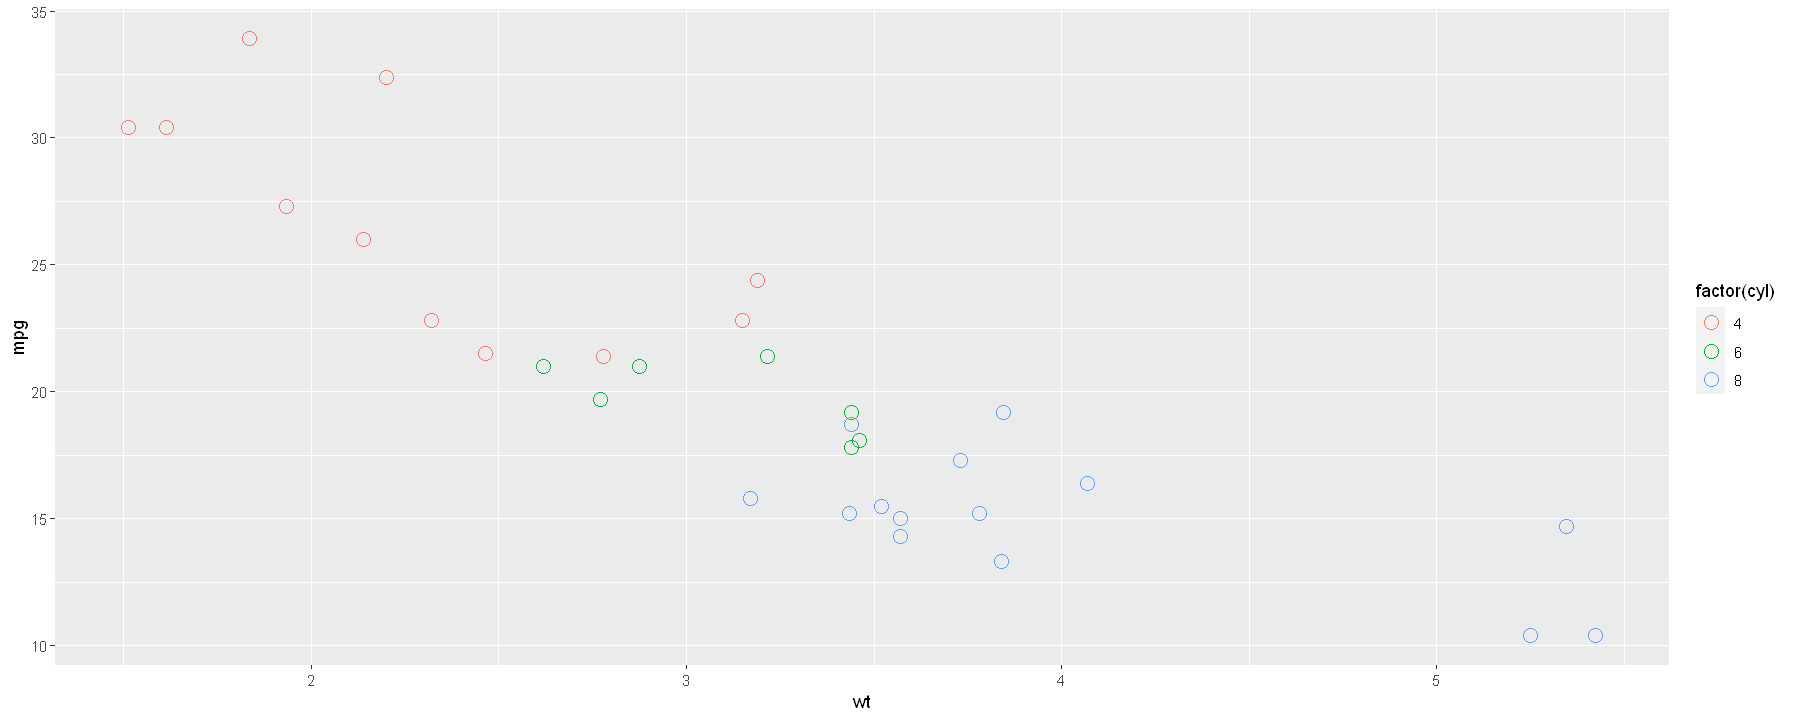

In [13]:
ggplot(mtcars, aes(wt, mpg, color = factor(cyl))) +
  # Set the shape and size of the points
  geom_point(shape=1, size=4)

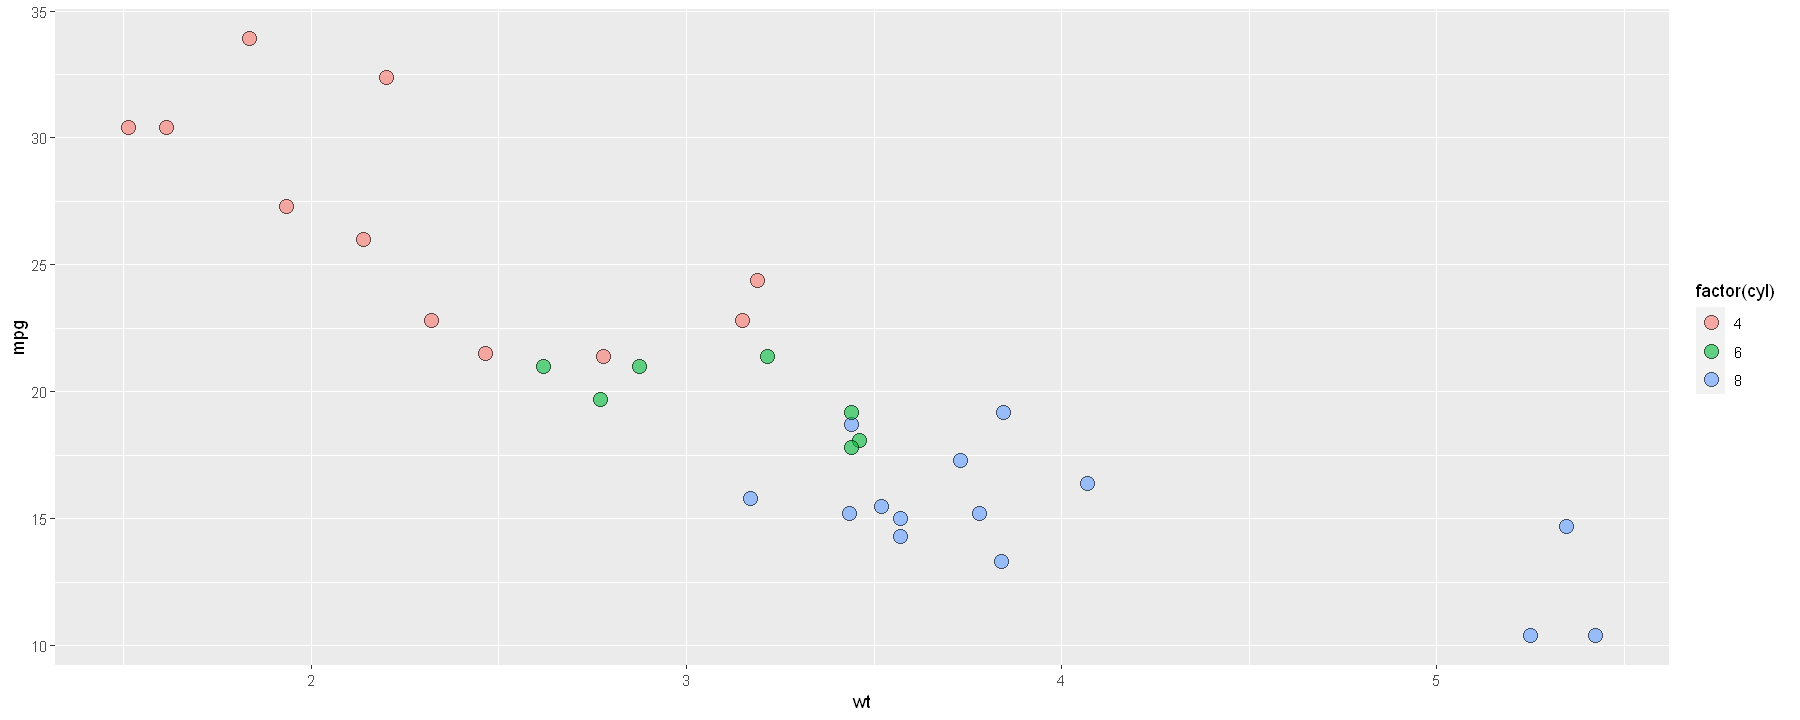

In [14]:
ggplot(mtcars, aes(wt, mpg, fill = factor(cyl))) +
  # Change point shape; set alpha
  geom_point(shape = 21, alpha=0.6, size = 4)

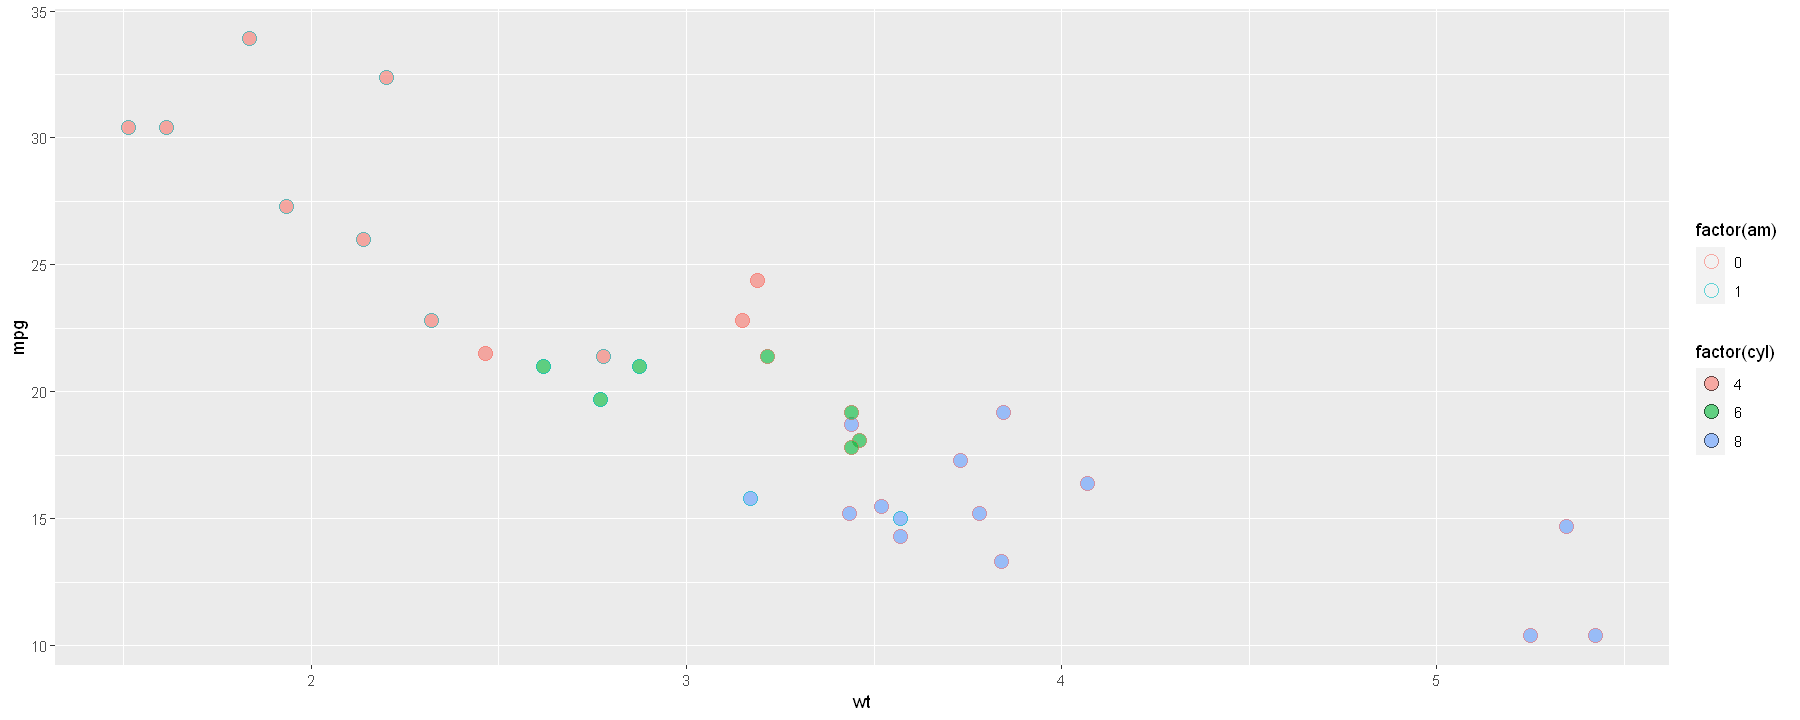

In [15]:
ggplot(mtcars, aes(wt, mpg, fill = factor(cyl), color =factor(am))) +
  geom_point(shape = 21, size = 4, alpha = 0.6)

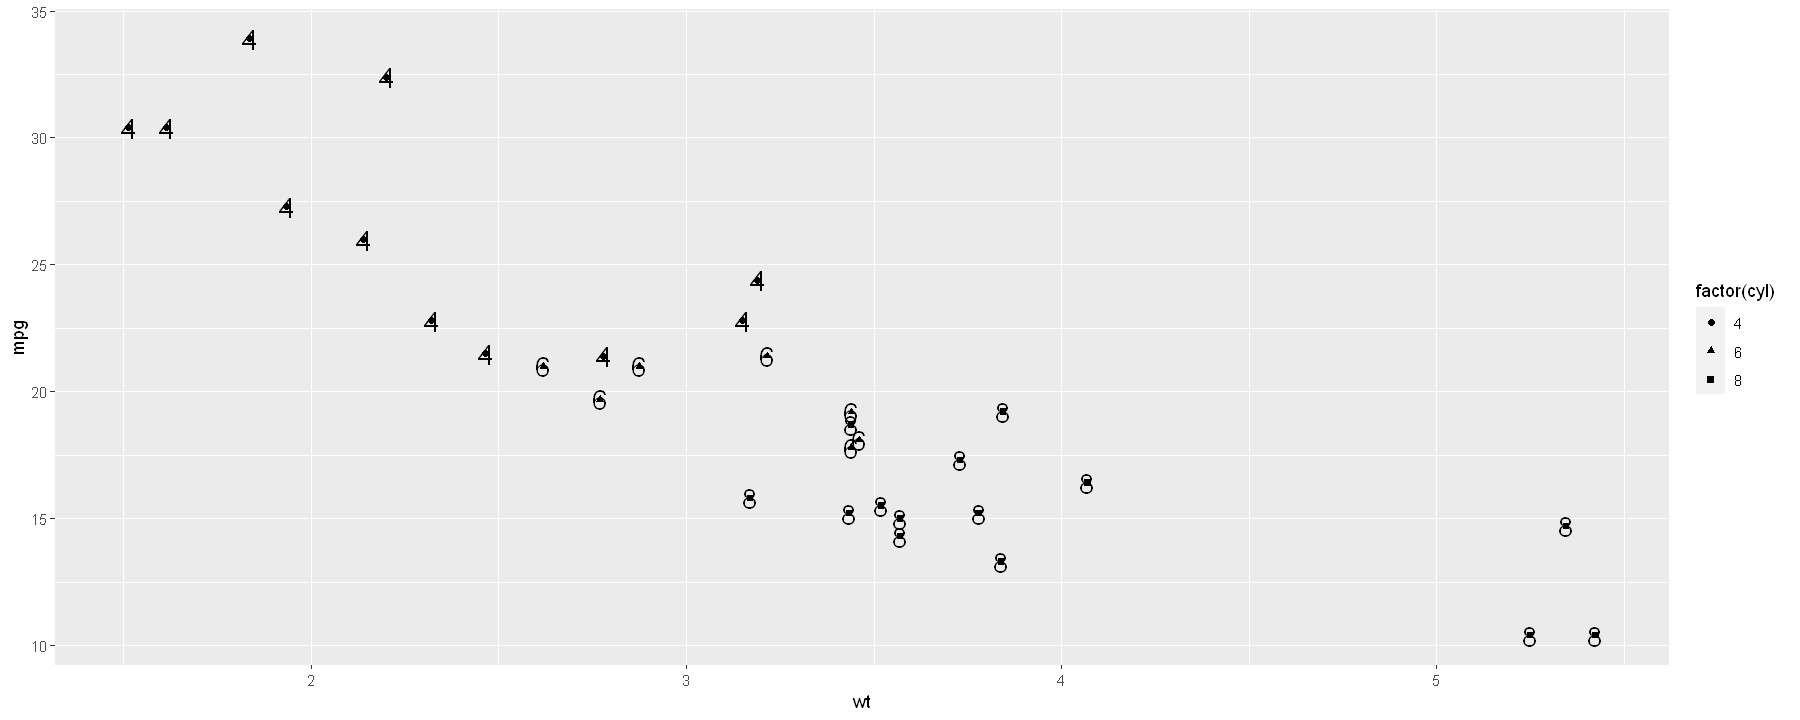

In [16]:
# Base layer
plt_mpg_vs_wt <- ggplot(mtcars, aes(wt, mpg))

# Use text layer and map fcyl to label
plt_mpg_vs_wt +
  geom_point(aes(shape = factor(cyl)))+ geom_text(aes(label=factor(cyl)), size=6)

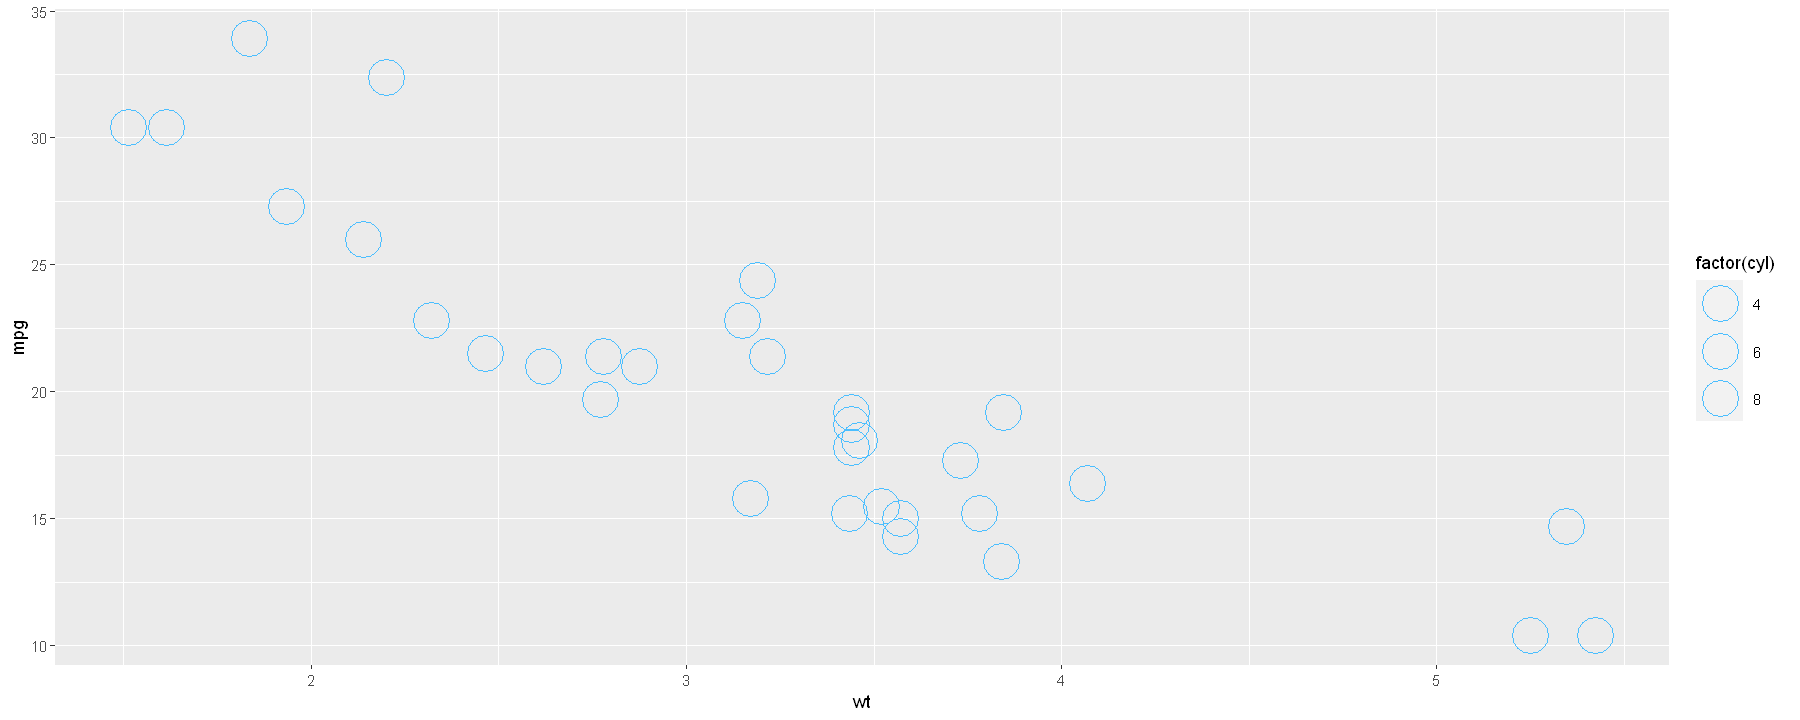

In [17]:
# A hexadecimal color
my_blue <- "#4ABEFF"

# Change the color mapping to a fill mapping
ggplot(mtcars, aes(wt, mpg, fill = factor(cyl))) +
  # Set point size and shape
  geom_point(color=my_blue, shape=1, size=10)

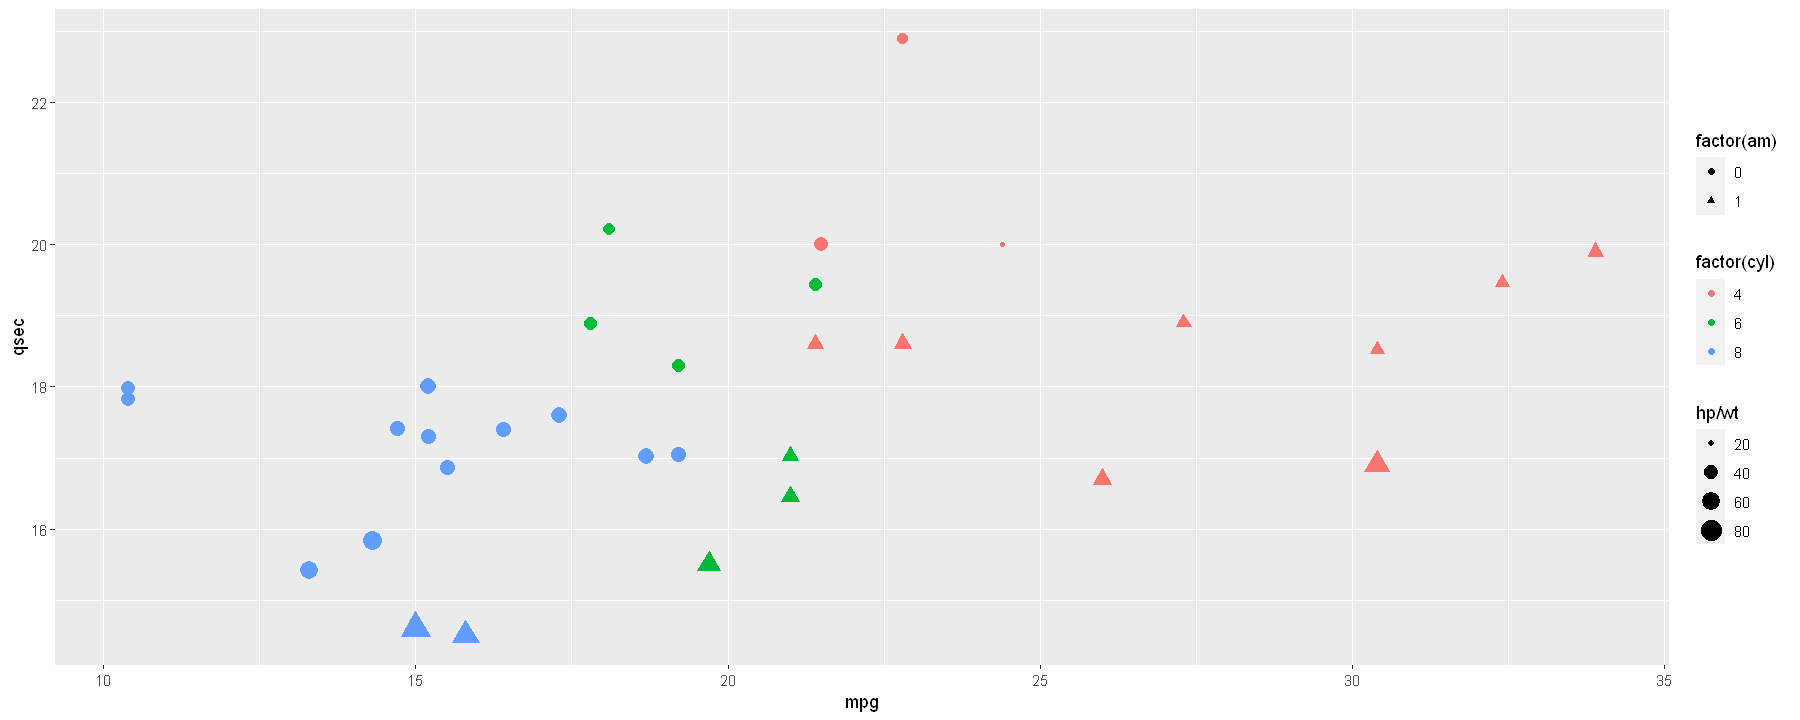

In [18]:
ggplot(mtcars, aes(mpg, qsec, color = factor(cyl), shape = factor(am), size=hp/wt)) +
  geom_point()

without position


<ggproto object: Class ScaleDiscrete, Scale, gg>
    aesthetics: fill
    axis_order: function
    break_info: function
    break_positions: function
    breaks: waiver
    call: call
    clone: function
    dimension: function
    drop: TRUE
    expand: waiver
    get_breaks: function
    get_breaks_minor: function
    get_labels: function
    get_limits: function
    guide: legend
    is_discrete: function
    is_empty: function
    labels: waiver
    limits: NULL
    make_sec_title: function
    make_title: function
    map: function
    map_df: function
    n.breaks.cache: NULL
    na.translate: TRUE
    na.value: NA
    name: Transmission
    palette: function
    palette.cache: NULL
    position: left
    range: <ggproto object: Class RangeDiscrete, Range, gg>
        range: NULL
        reset: function
        train: function
        super:  <ggproto object: Class RangeDiscrete, Range, gg>
    rescale: function
    reset: function
    scale_name: manual
    train: function
    t

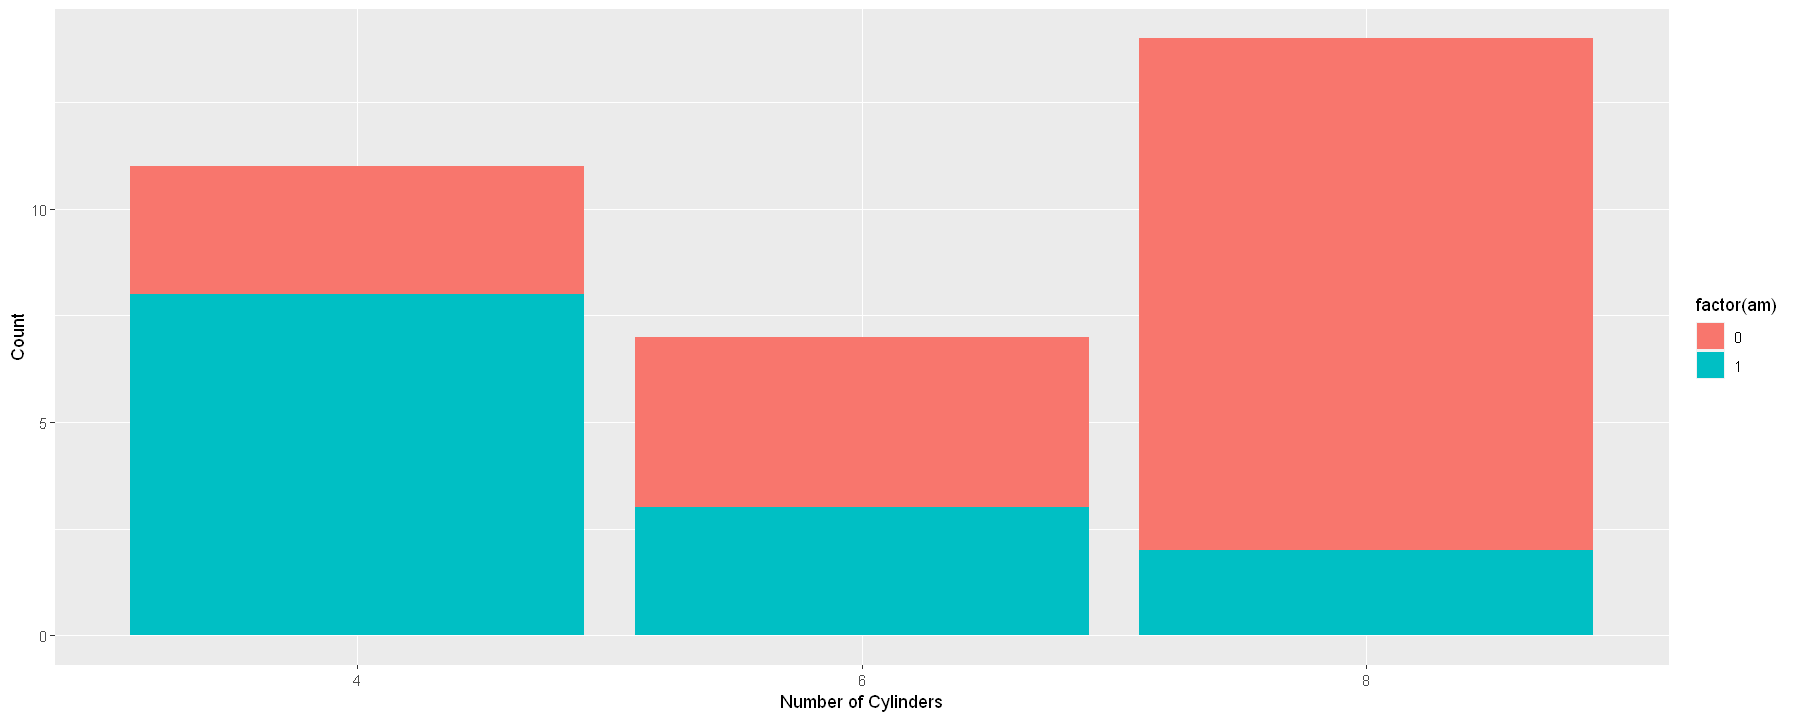

In [19]:
palette <- c(automatic = "#377EB8", manual = "#E41A1C")

# Set the position
a <-ggplot(mtcars, aes(factor(cyl), fill = factor(am))) +
  geom_bar() +
  labs(x = "Number of Cylinders", y = "Count")
  scale_fill_manual("Transmission", values = palette);

a;

<ggproto object: Class ScaleDiscrete, Scale, gg>
    aesthetics: fill
    axis_order: function
    break_info: function
    break_positions: function
    breaks: waiver
    call: call
    clone: function
    dimension: function
    drop: TRUE
    expand: waiver
    get_breaks: function
    get_breaks_minor: function
    get_labels: function
    get_limits: function
    guide: legend
    is_discrete: function
    is_empty: function
    labels: waiver
    limits: NULL
    make_sec_title: function
    make_title: function
    map: function
    map_df: function
    n.breaks.cache: NULL
    na.translate: TRUE
    na.value: NA
    name: Transmission
    palette: function
    palette.cache: NULL
    position: left
    range: <ggproto object: Class RangeDiscrete, Range, gg>
        range: NULL
        reset: function
        train: function
        super:  <ggproto object: Class RangeDiscrete, Range, gg>
    rescale: function
    reset: function
    scale_name: manual
    train: function
    t

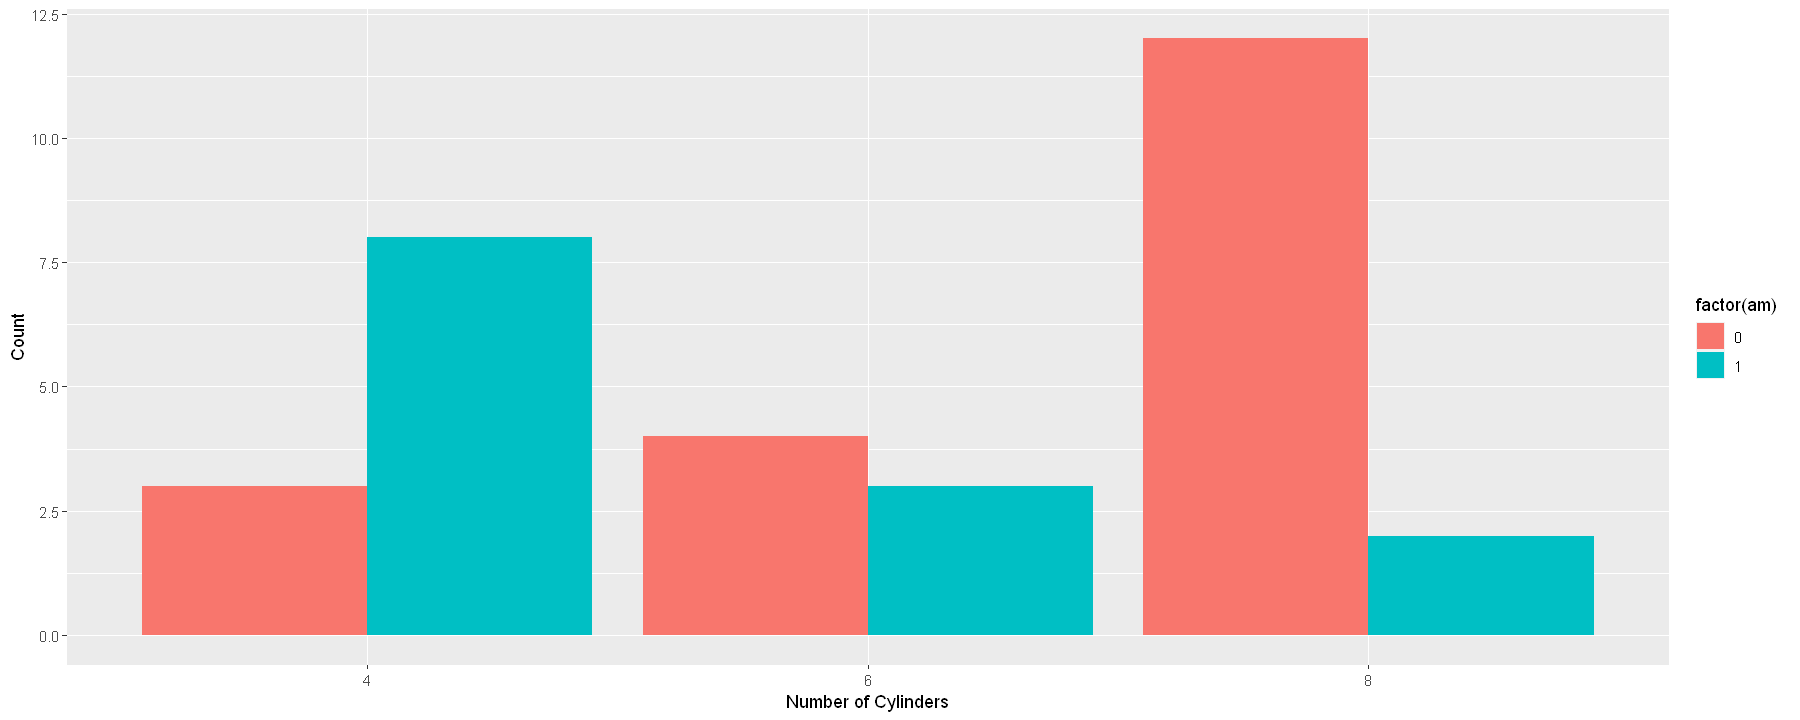

In [20]:
palette <- c(automatic = "#377EB8", manual = "#E41A1C")

# Set the position
ggplot(mtcars, aes(factor(cyl), fill = factor(am))) +
  geom_bar(position='dodge') +
  labs(x = "Number of Cylinders", y = "Count")
  scale_fill_manual("Transmission", values = palette)

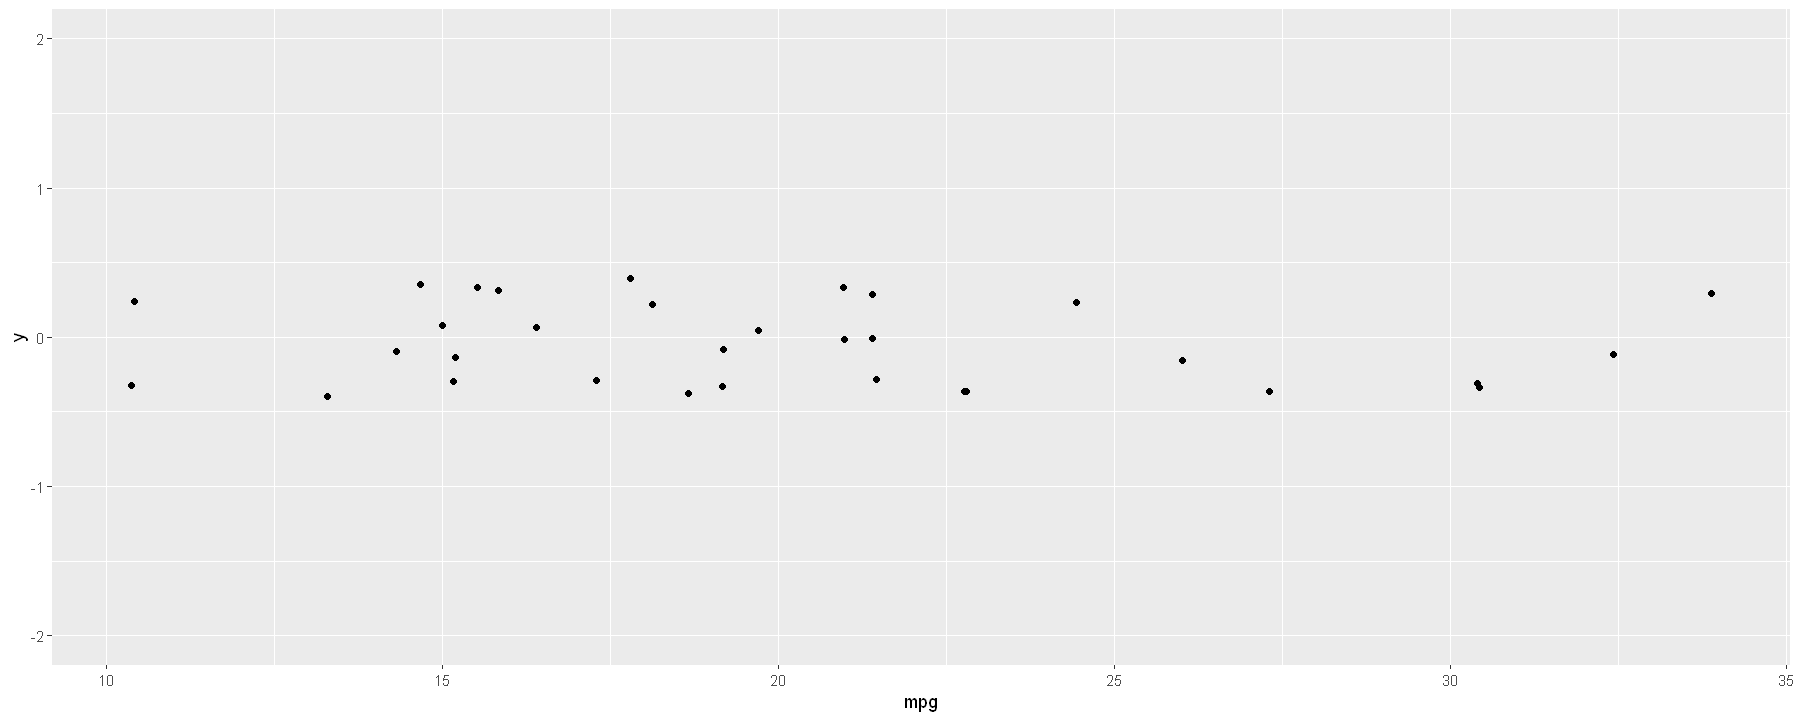

In [21]:
ggplot(mtcars, aes(mpg, 0)) +
  geom_jitter() +
  # Set the y-axis limits
  ylim(-2,2)

### 3. Geometries


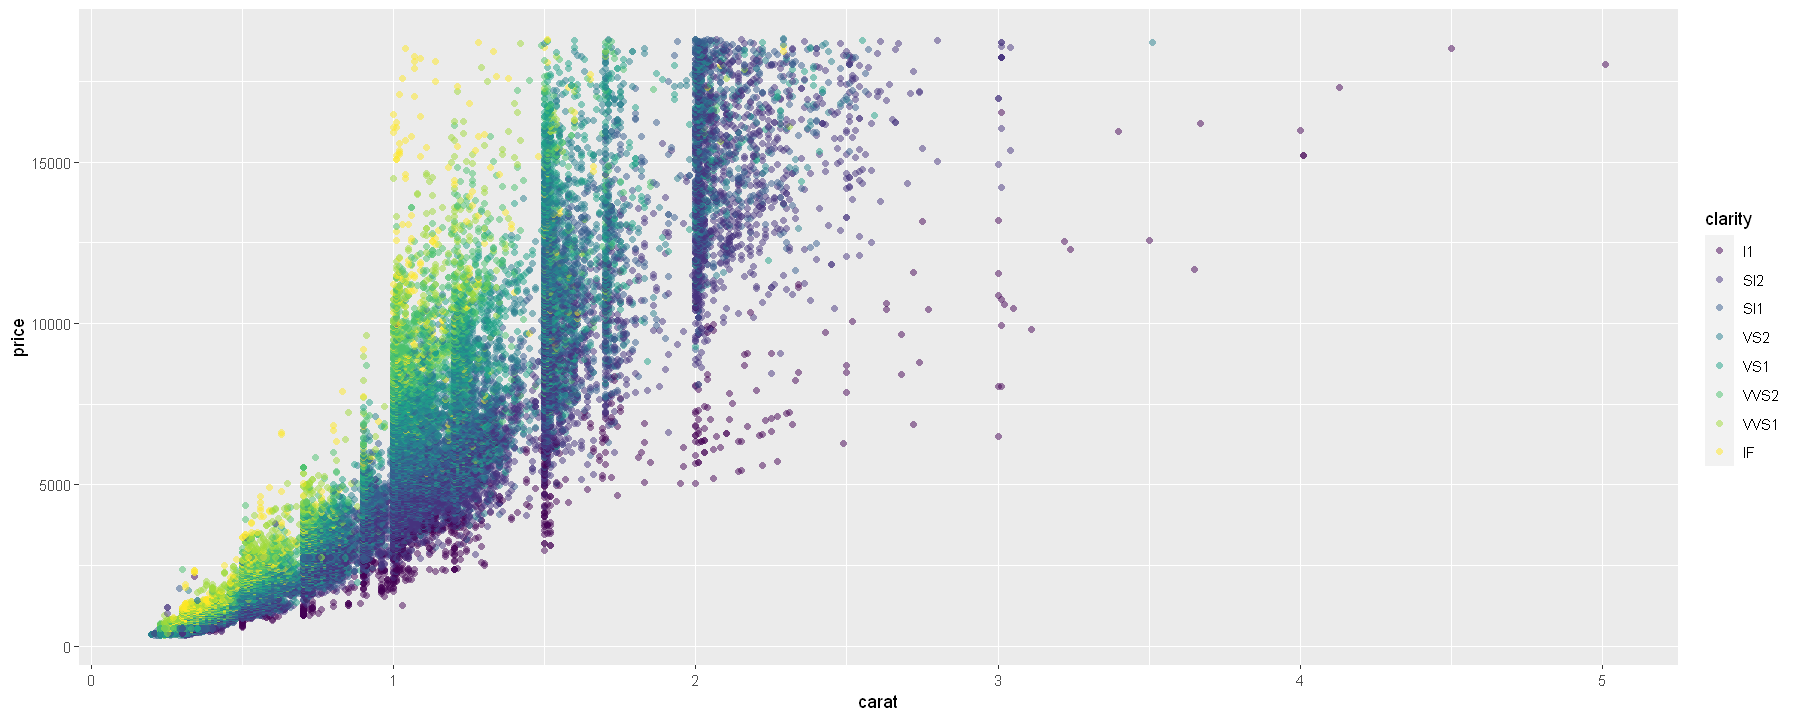

In [22]:
# Plot price vs. carat, colored by clarity
plt_price_vs_carat_by_clarity <- ggplot(diamonds, aes(carat, price, color = clarity))

# Set transparency to 0.5
plt_price_vs_carat_by_clarity + geom_point(alpha = 0.5, shape = 16)  

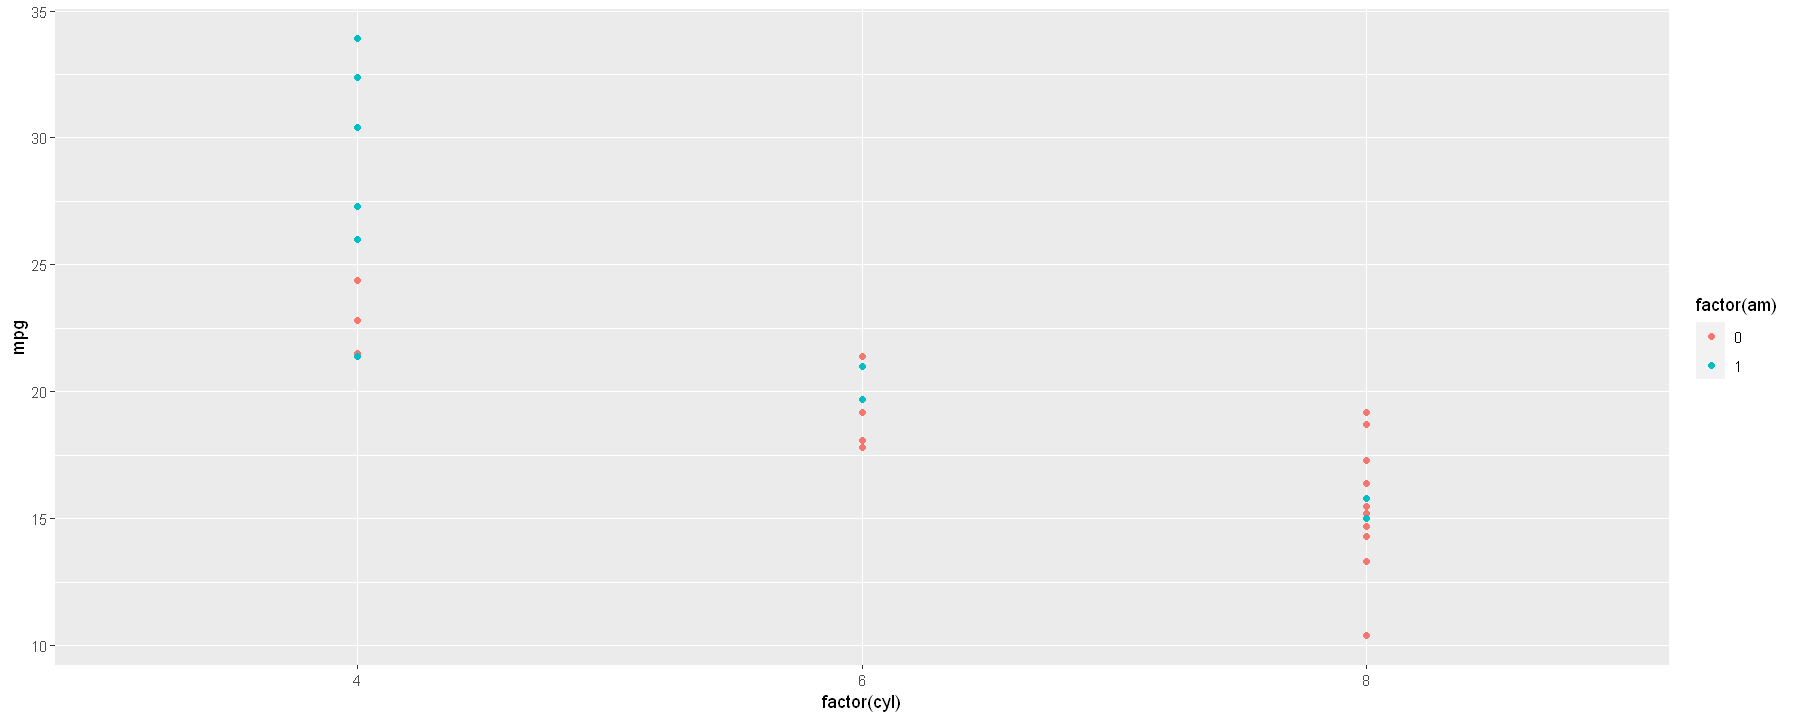

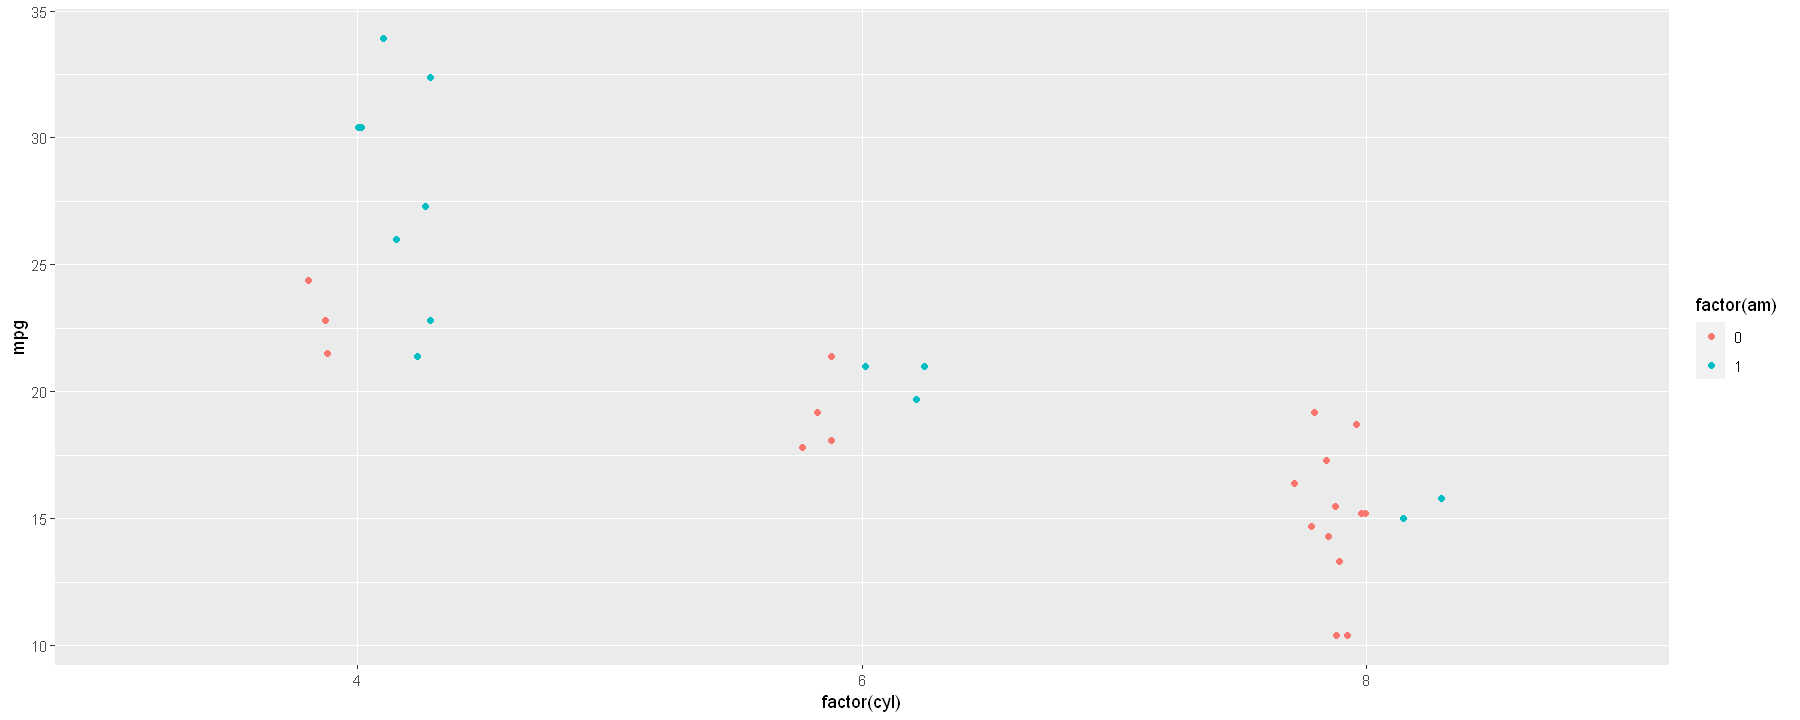

In [23]:
# Plot base
plt_mpg_vs_fcyl_by_fam <- ggplot(mtcars, aes(factor(cyl), mpg, color = factor(am)))

# Default points are shown for comparison
plt_mpg_vs_fcyl_by_fam + geom_point()

# Now jitter and dodge the point positions
plt_mpg_vs_fcyl_by_fam + geom_point(position = position_jitterdodge(dodge.width=0.3,jitter.width= 0.3))

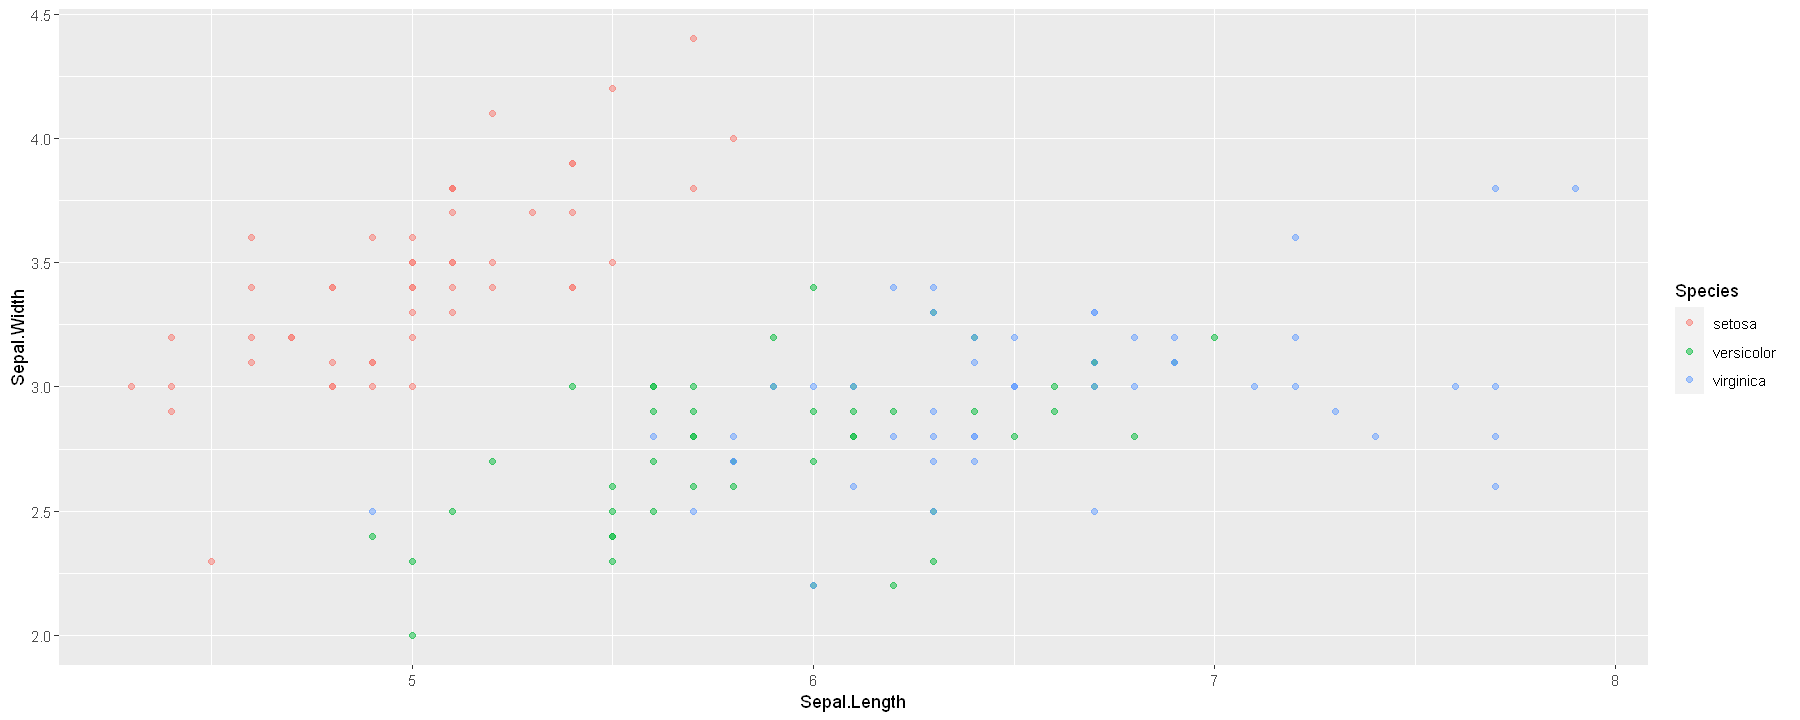

In [24]:
ggplot(iris, aes(Sepal.Length, Sepal.Width, color = Species)) +
  # Swap for jitter layer with width 0.1
  geom_point(alpha = 0.5)

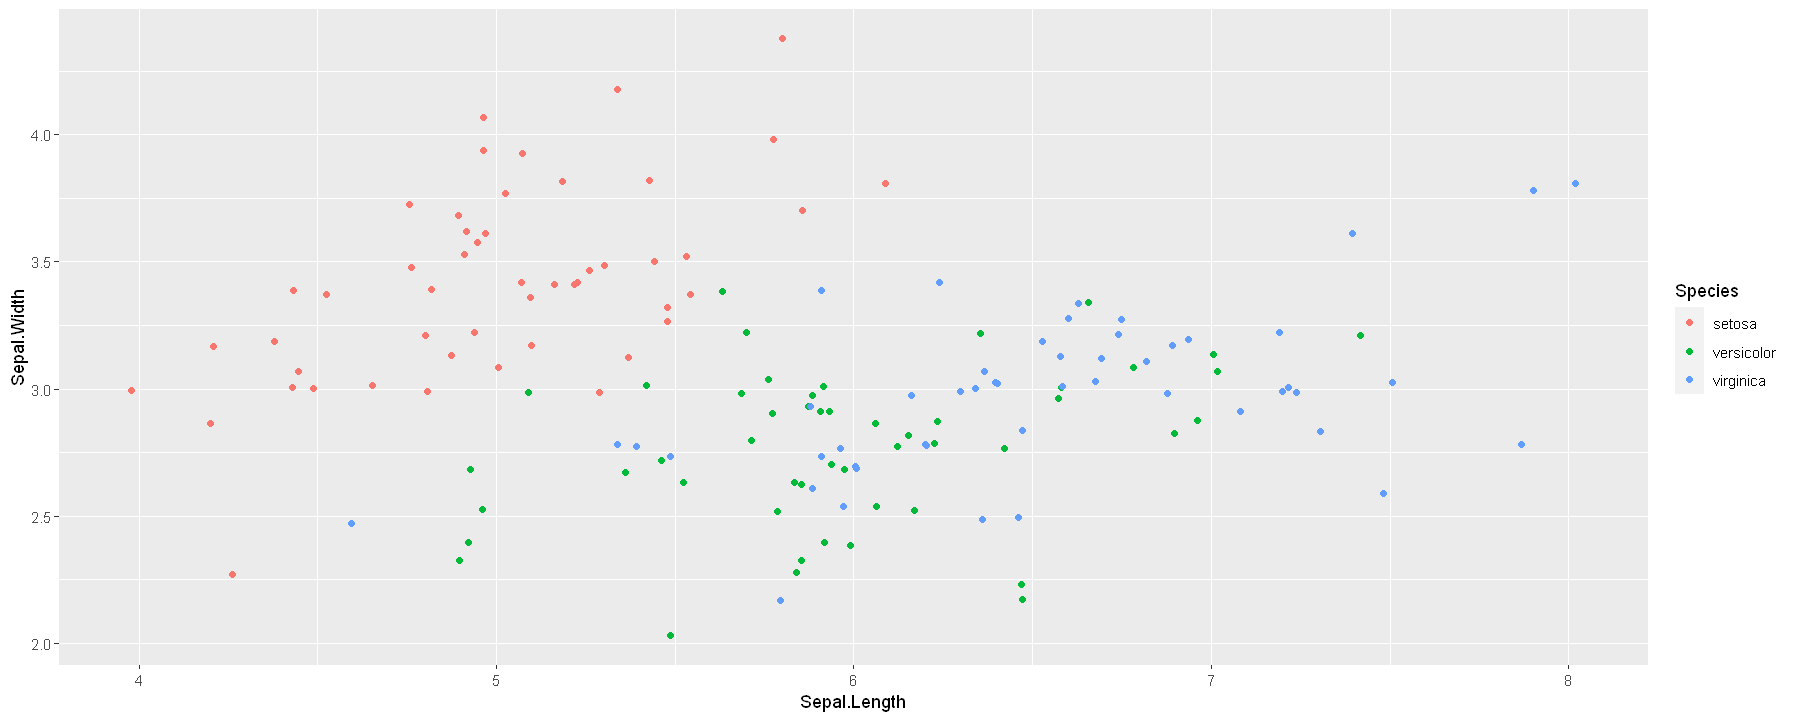

In [25]:
ggplot(iris, aes(Sepal.Length, Sepal.Width, color = Species)) +
  # Swap for jitter layer with width 0.5
  geom_jitter(width=0.5)

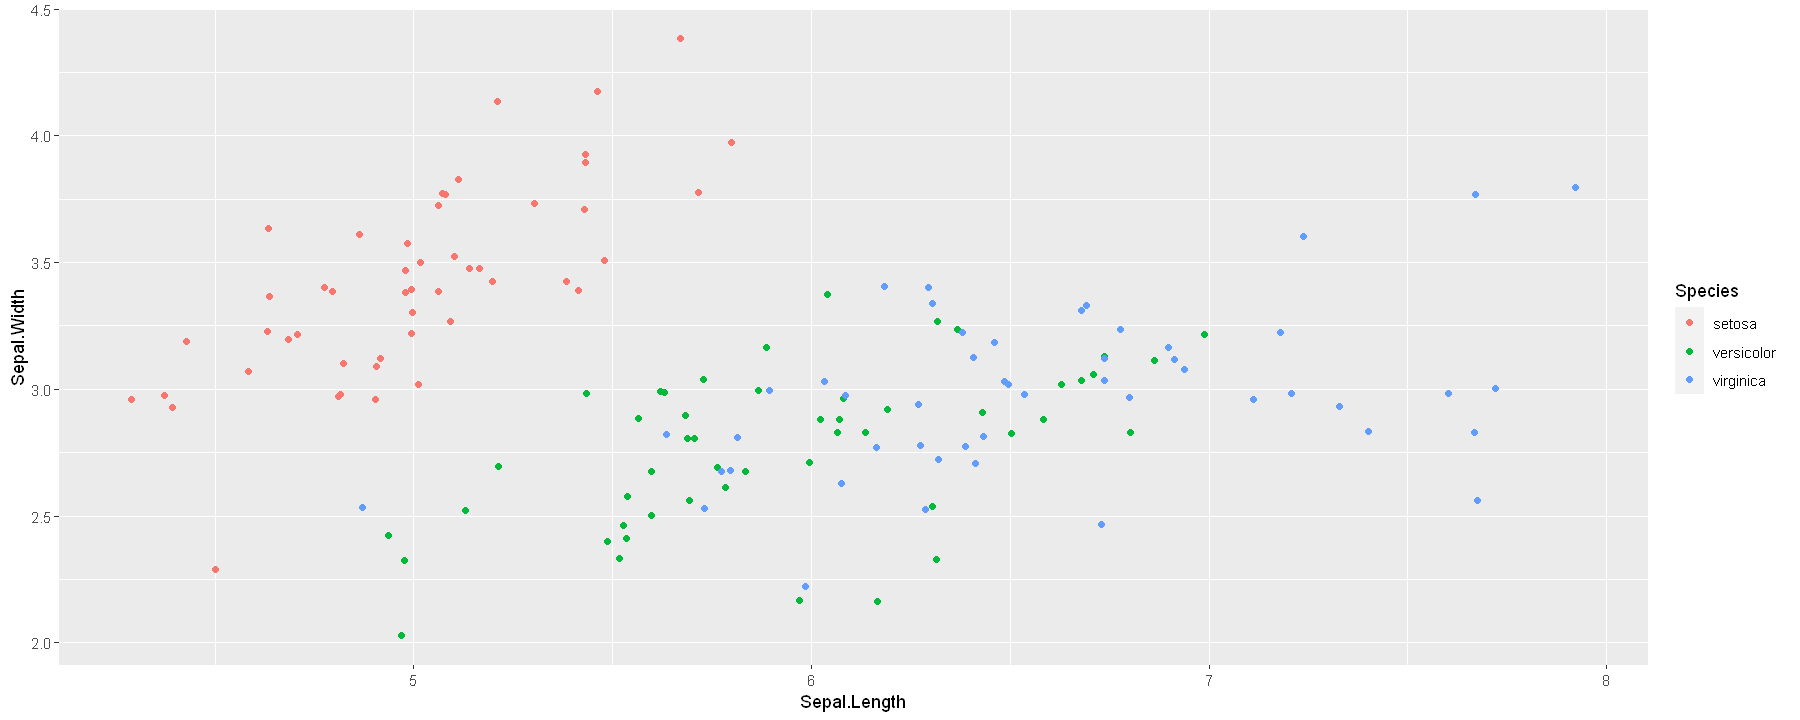

In [26]:
ggplot(iris, aes(Sepal.Length, Sepal.Width, color = Species)) +
  # Swap for jitter layer with width 0.1
  geom_point( position='jitter')

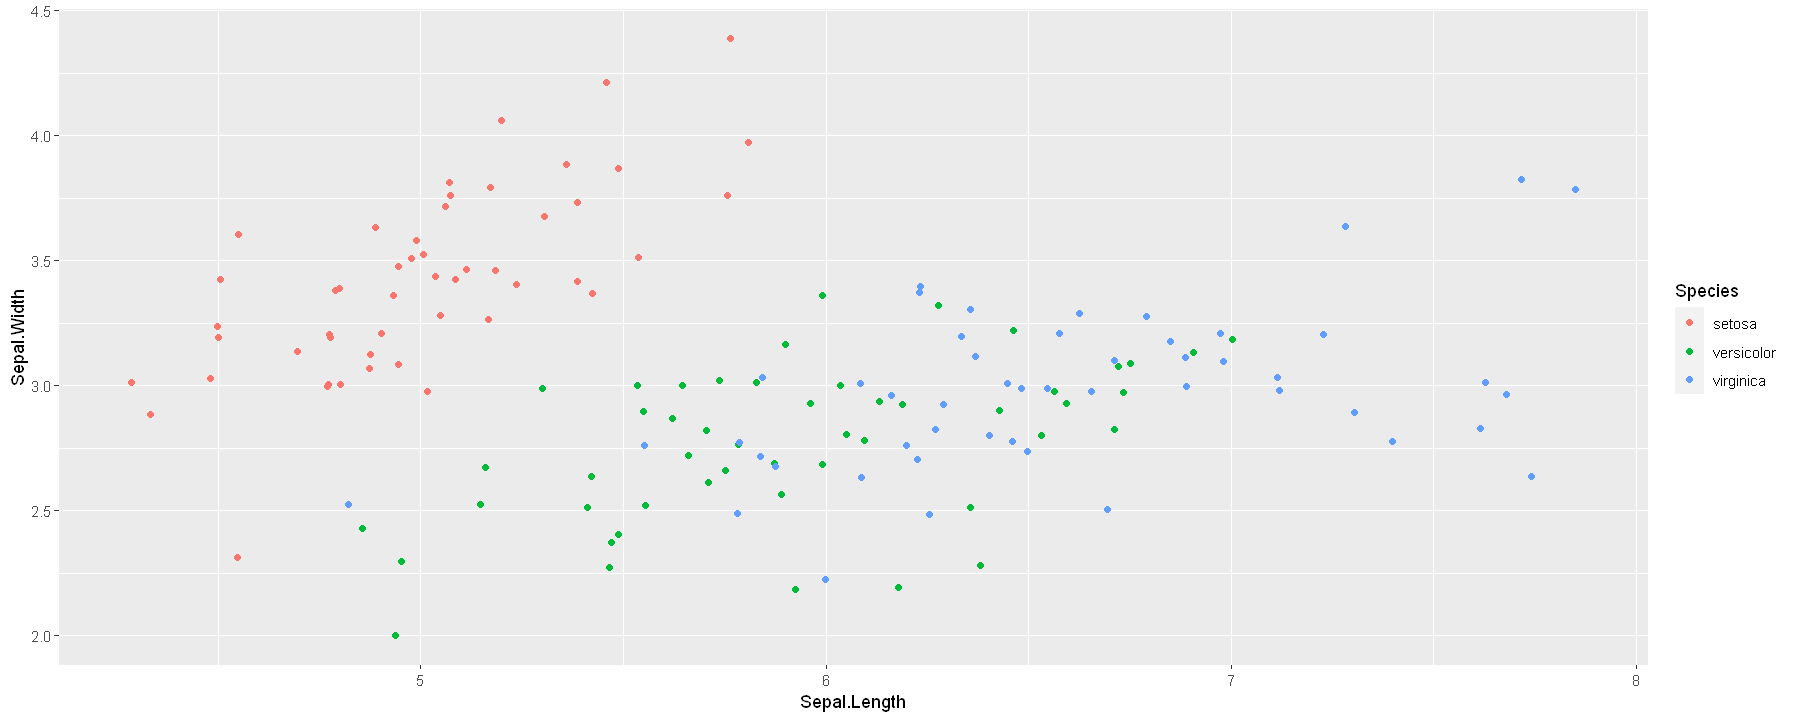

In [27]:
ggplot(iris, aes(Sepal.Length, Sepal.Width, color = Species)) +
  # Use a jitter position function with width 0.1
  geom_point(position=position_jitter(width=0.1))

'data.frame':	30351 obs. of  4 variables:
 $ year      : num  1974 1974 1974 1974 1974 ...
 $ sex       : Factor w/ 2 levels "Female","Male": 2 2 1 1 1 2 2 2 1 1 ...
 $ education : num  14 16 10 10 12 16 17 10 12 11 ...
 $ vocabulary: num  9 9 9 5 8 8 9 5 3 5 ...
 - attr(*, "na.action")= 'omit' Named int  1 2 3 4 5 6 7 8 9 10 ...
  ..- attr(*, "names")= chr  "19720001" "19720002" "19720003" "19720004" ...


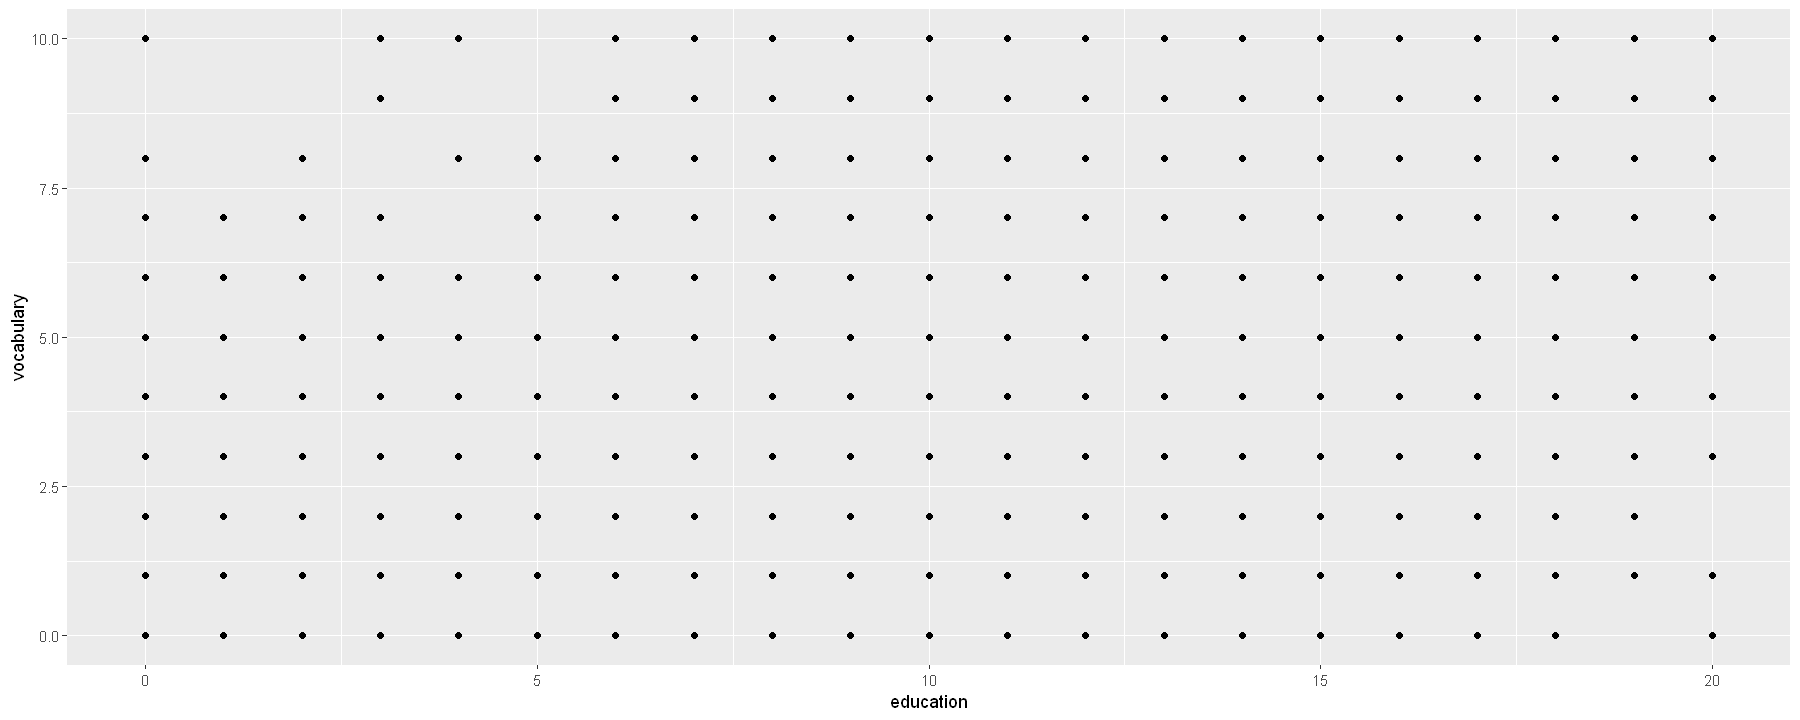

In [28]:
# Examine the structure of Vocab

str(Vocab)

# Plot vocabulary vs. education
ggplot(Vocab, aes(y=vocabulary, x=education)) +
  # Add a point layer
  geom_point()

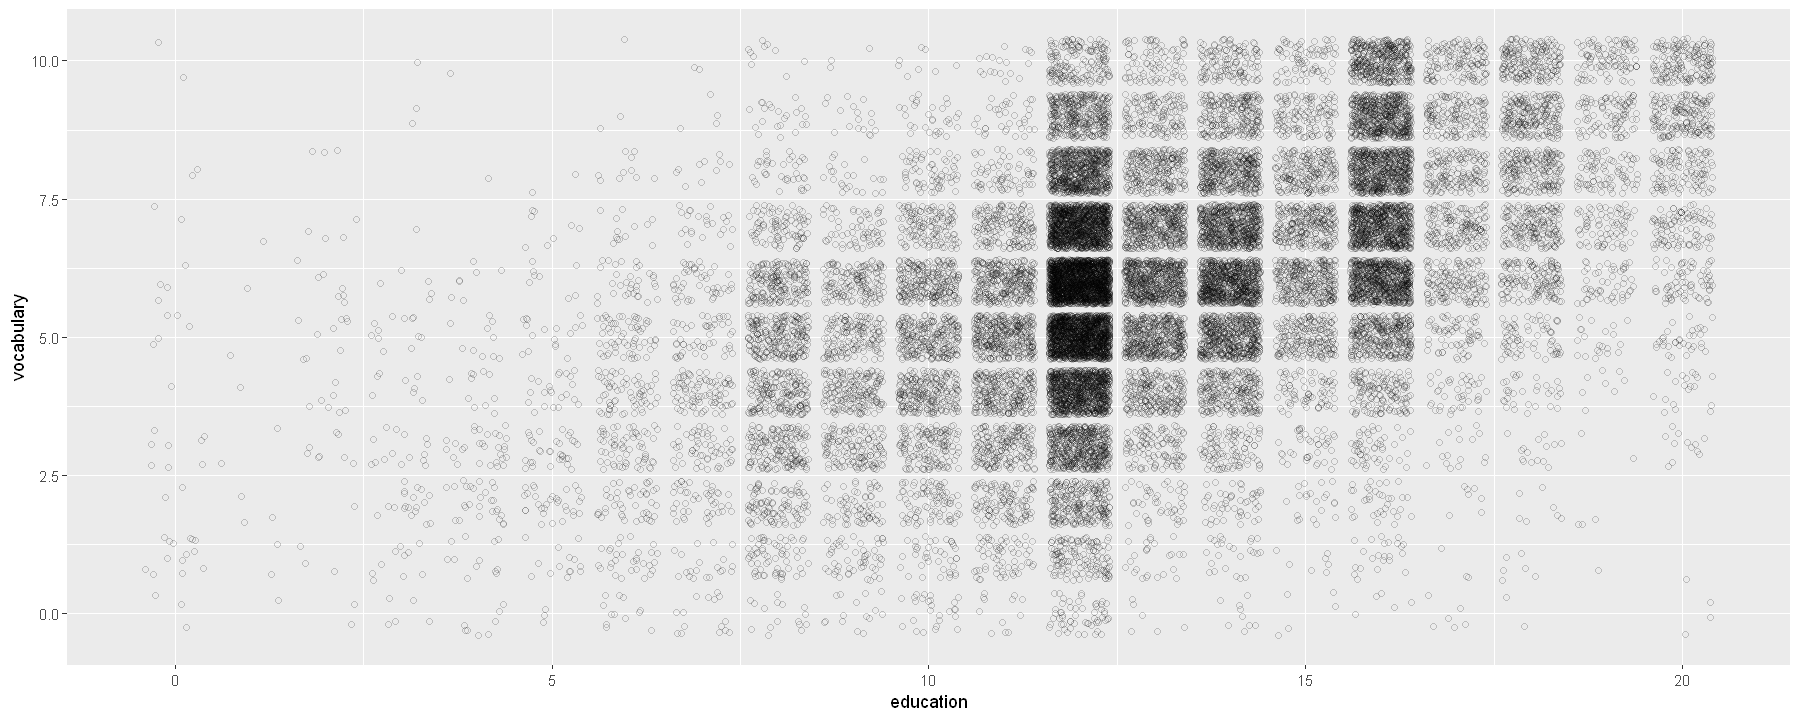

In [29]:
ggplot(Vocab, aes(education, vocabulary)) +
  # Set the shape to 1
  geom_jitter(alpha = 0.2, shape=1)

#### Historgram


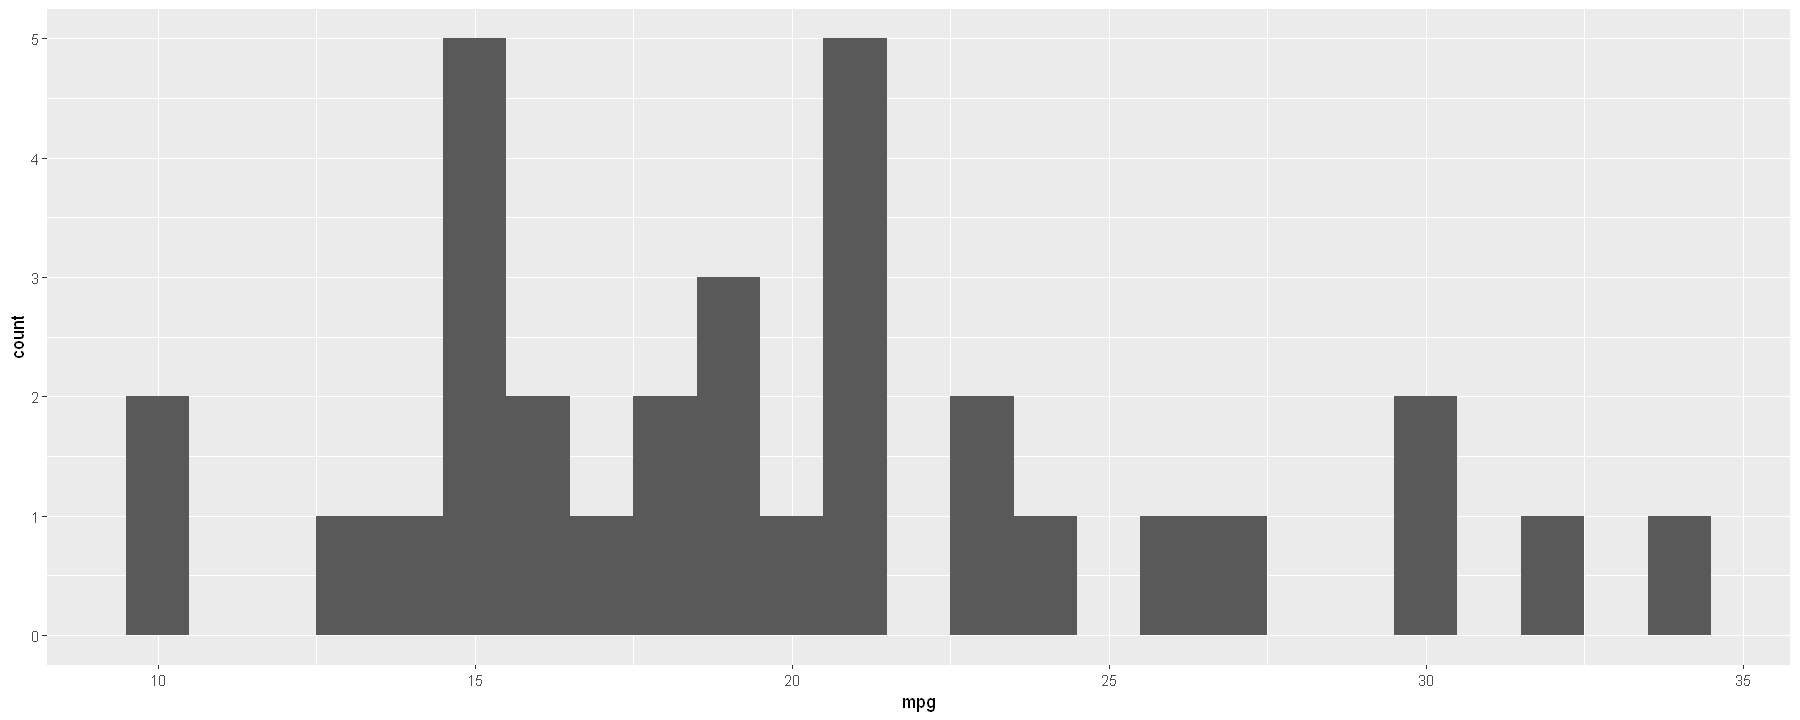

In [30]:
ggplot(mtcars, aes(mpg)) +
  geom_histogram(binwidth = 1)

'data.frame':	32 obs. of  11 variables:
 $ mpg : num  21 21 22.8 21.4 18.7 18.1 14.3 24.4 22.8 19.2 ...
 $ cyl : num  6 6 4 6 8 6 8 4 4 6 ...
 $ disp: num  160 160 108 258 360 ...
 $ hp  : num  110 110 93 110 175 105 245 62 95 123 ...
 $ drat: num  3.9 3.9 3.85 3.08 3.15 2.76 3.21 3.69 3.92 3.92 ...
 $ wt  : num  2.62 2.88 2.32 3.21 3.44 ...
 $ qsec: num  16.5 17 18.6 19.4 17 ...
 $ vs  : num  0 0 1 1 0 1 0 1 1 1 ...
 $ am  : num  1 1 1 0 0 0 0 0 0 0 ...
 $ gear: num  4 4 4 3 3 3 3 4 4 4 ...
 $ carb: num  4 4 1 1 2 1 4 2 2 4 ...


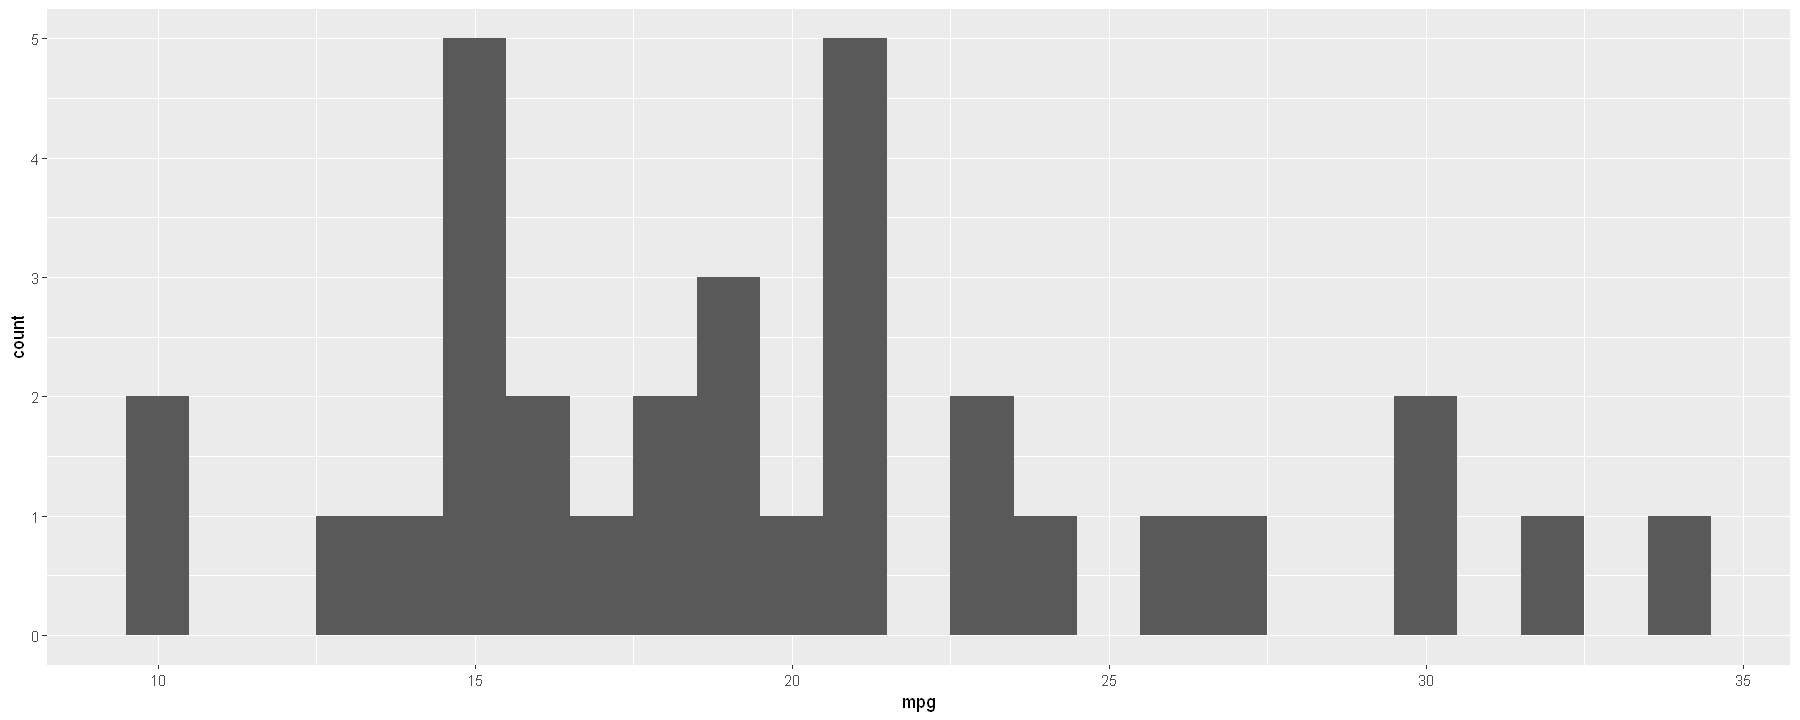

In [31]:
str(mtcars)
ggplot(mtcars, aes(mpg)) +
  geom_histogram(binwidth = 1)

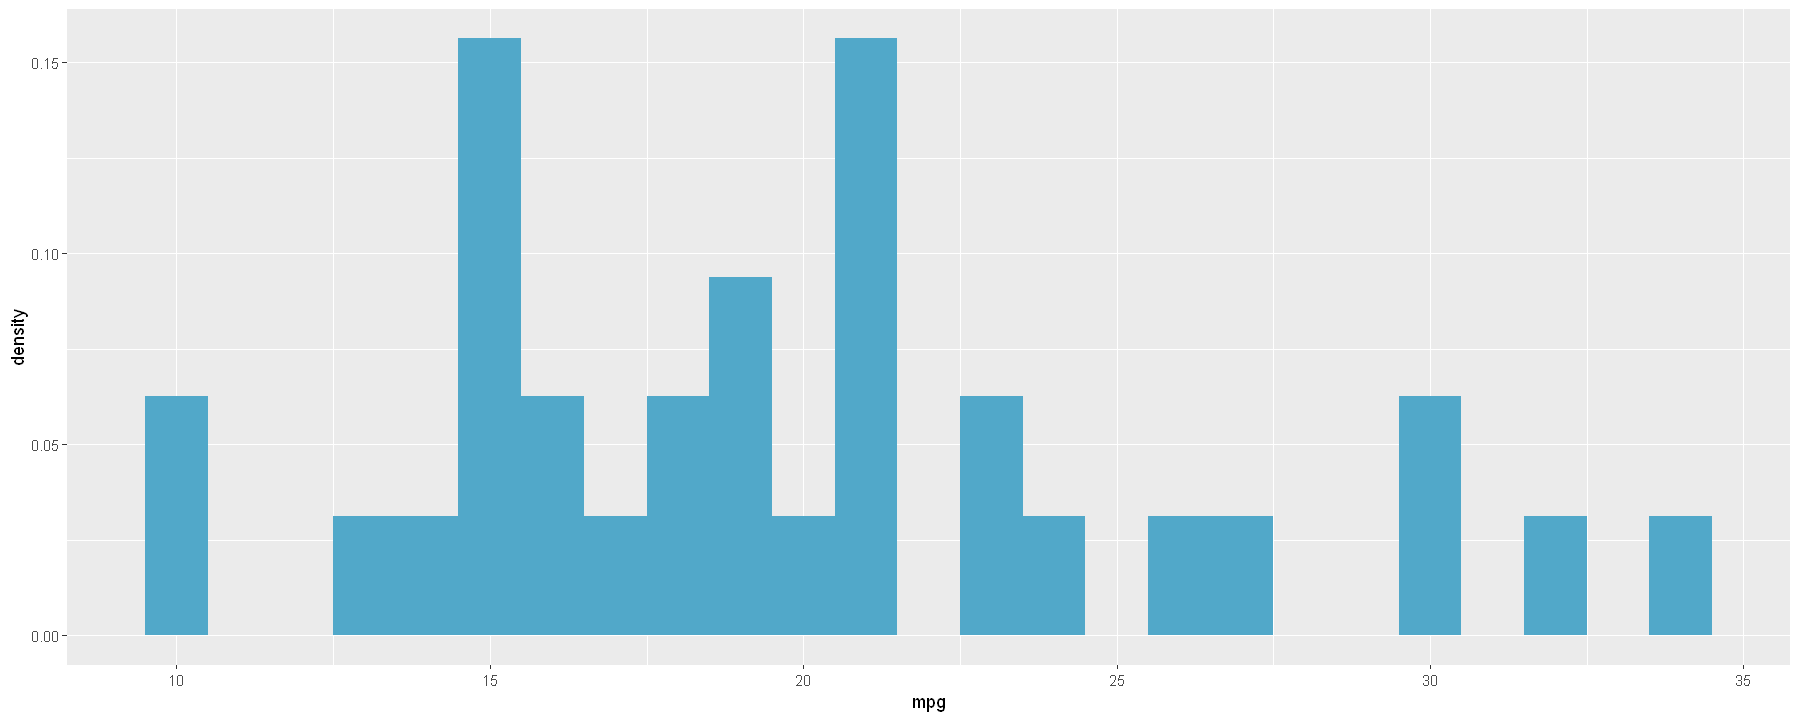

In [32]:
light_blue <- "#51A8C9"

ggplot(mtcars, aes(mpg, ..density..)) +
  # Set the fill color to datacamp_light_blue
  geom_histogram(binwidth = 1, fill=light_blue)

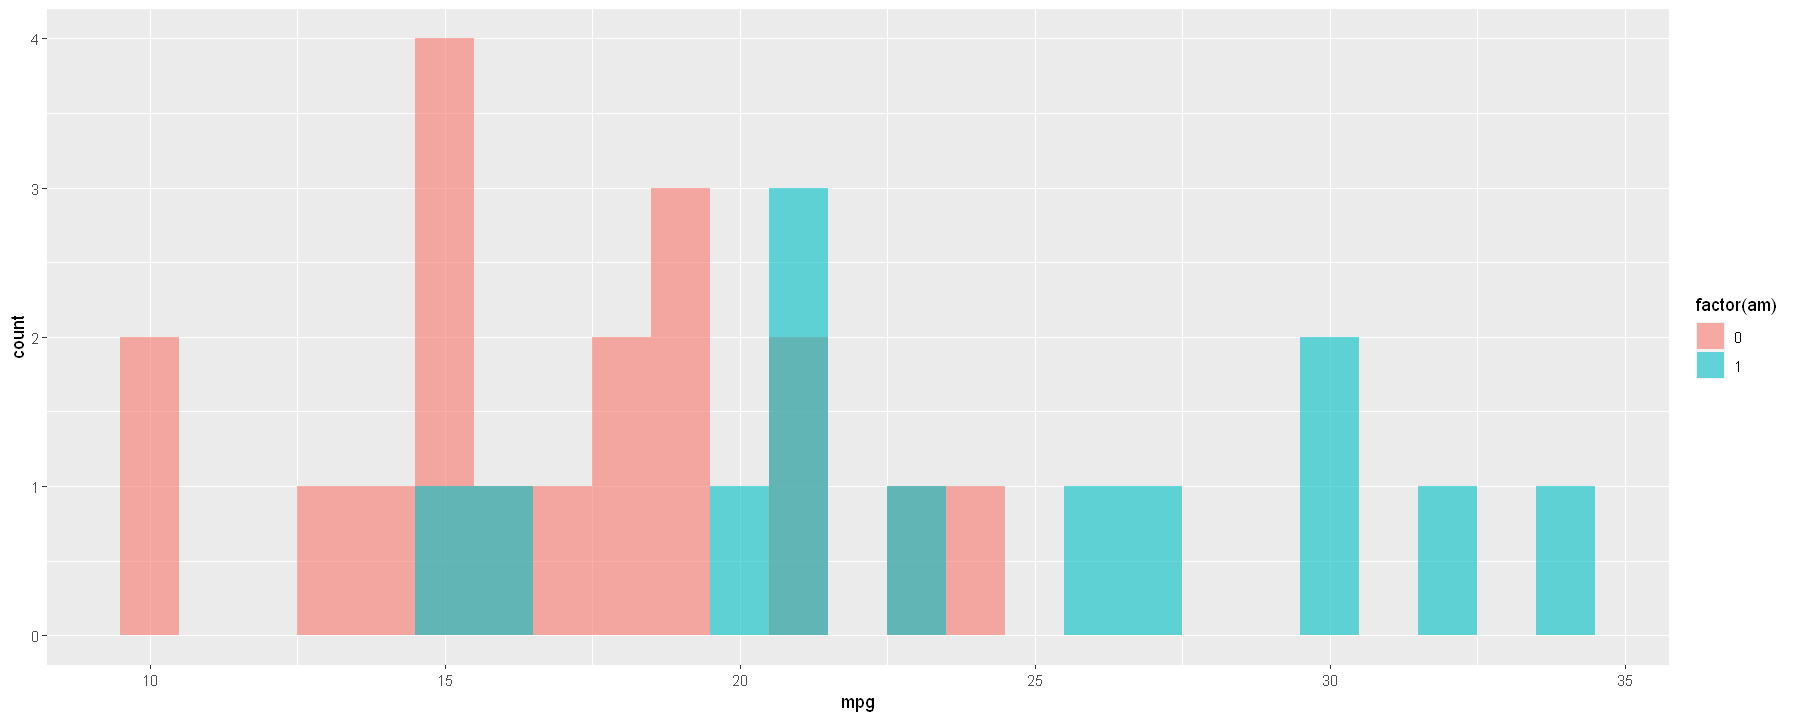

In [33]:
ggplot(mtcars, aes(mpg, fill = factor(am))) +
  # Change the position to identity, with transparency 0.6
  geom_histogram(binwidth = 1, position = "identity", alpha=0.6, )

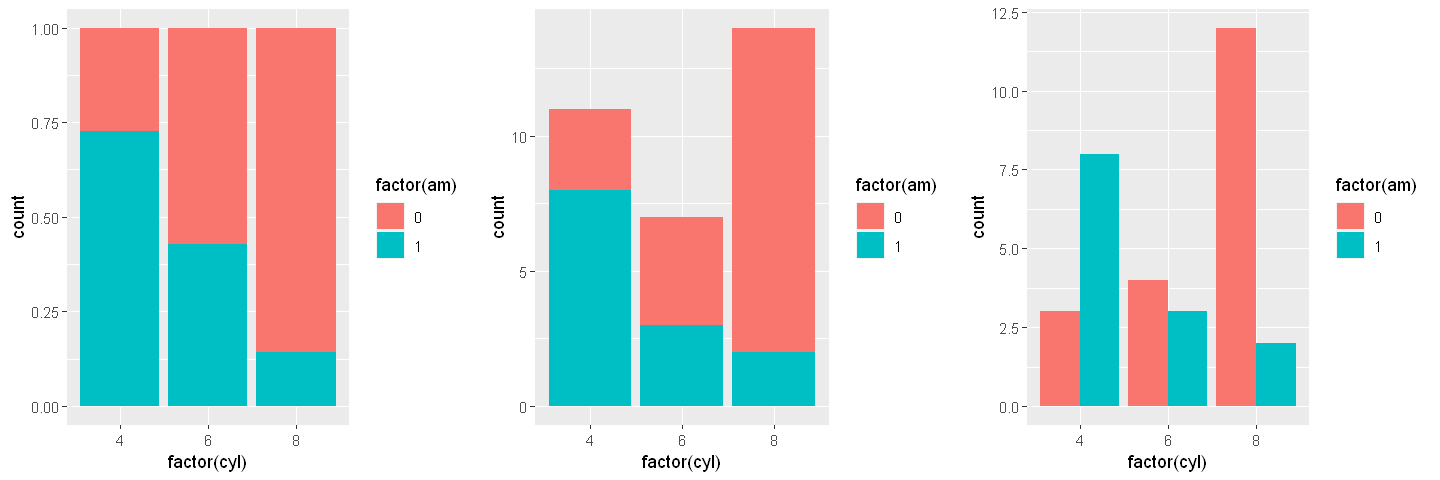

In [34]:
library(gridExtra)
options(repr.plot.width=12, repr.plot.height=4)


p1 <- ggplot(mtcars, aes(factor(cyl), fill = factor(am))) +
  # Change the position to "dodge"
  geom_bar(position = "fill")

p2 <- ggplot(mtcars, aes(factor(cyl), fill = factor(am))) +
  # Change the position to "dodge"
  geom_bar()

p3 <-ggplot(mtcars, aes(factor(cyl), fill = factor(am))) +
  # Change the position to "dodge"
  geom_bar(position = "dodge")

grid.arrange(p1, p2, p3, ncol=3)

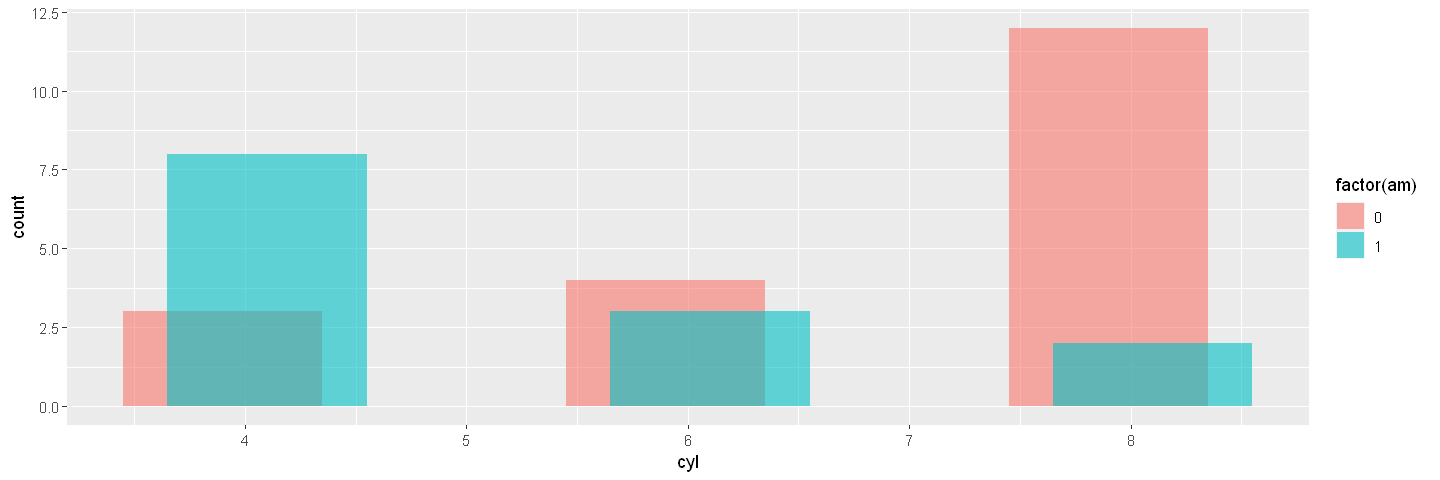

In [35]:
options(repr.plot.width=12, repr.plot.height=4)
ggplot(mtcars, aes(cyl, fill = factor(am))) +
  # Set the transparency to 0.6
  geom_bar(position = position_dodge(width = 0.4), alpha=0.6)

'data.frame':	30351 obs. of  4 variables:
 $ year      : num  1974 1974 1974 1974 1974 ...
 $ sex       : Factor w/ 2 levels "Female","Male": 2 2 1 1 1 2 2 2 1 1 ...
 $ education : num  14 16 10 10 12 16 17 10 12 11 ...
 $ vocabulary: num  9 9 9 5 8 8 9 5 3 5 ...
 - attr(*, "na.action")= 'omit' Named int  1 2 3 4 5 6 7 8 9 10 ...
  ..- attr(*, "names")= chr  "19720001" "19720002" "19720003" "19720004" ...


Warning message in RColorBrewer::brewer.pal(n, pal):
"n too large, allowed maximum for palette Blues is 9
Returning the palette you asked for with that many colors
"


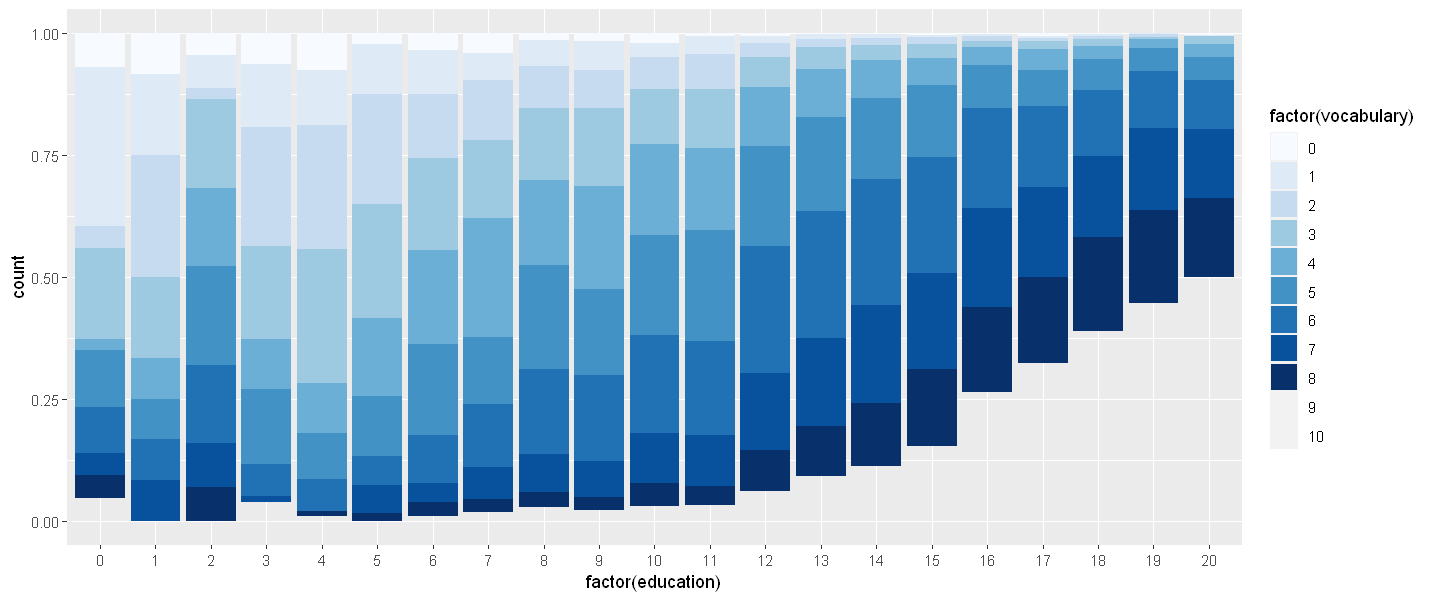

In [36]:
str(Vocab)

options(repr.plot.width=12, repr.plot.height=5)

ggplot(Vocab, aes(x = factor(education), fill = factor(vocabulary))) + 
  geom_bar(position = "fill") + 
  scale_fill_brewer(palette = "Blues")

#### Lineplot

date,pce,pop,psavert,uempmed,unemploy
<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1967-07-01,506.7,198712,12.6,4.5,2944
1967-08-01,509.8,198911,12.6,4.7,2945
1967-09-01,515.6,199113,11.9,4.6,2958
1967-10-01,512.2,199311,12.9,4.9,3143
1967-11-01,517.4,199498,12.8,4.7,3066
1967-12-01,525.1,199657,11.8,4.8,3018


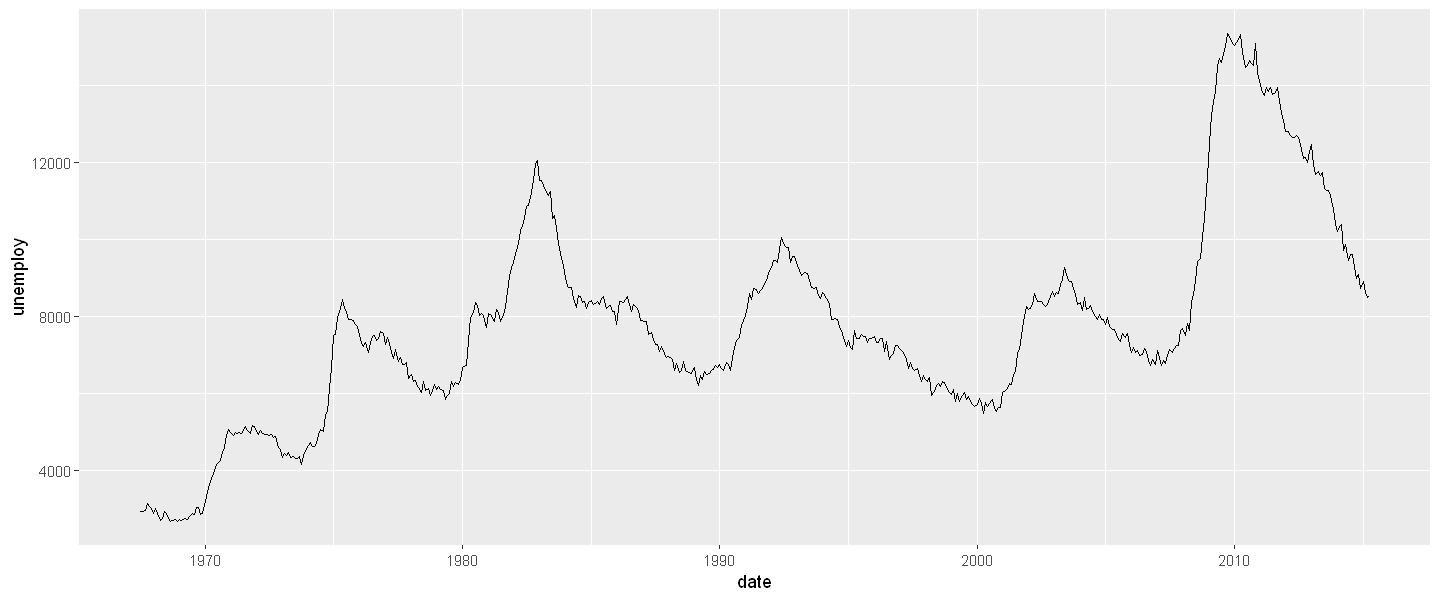

In [37]:
# Print the head of economics
head(economics)

# Using economics, plot unemploy vs. date
ggplot(economics, aes(x=date, y=unemploy)) +
  # Make it a line plot
  geom_line()

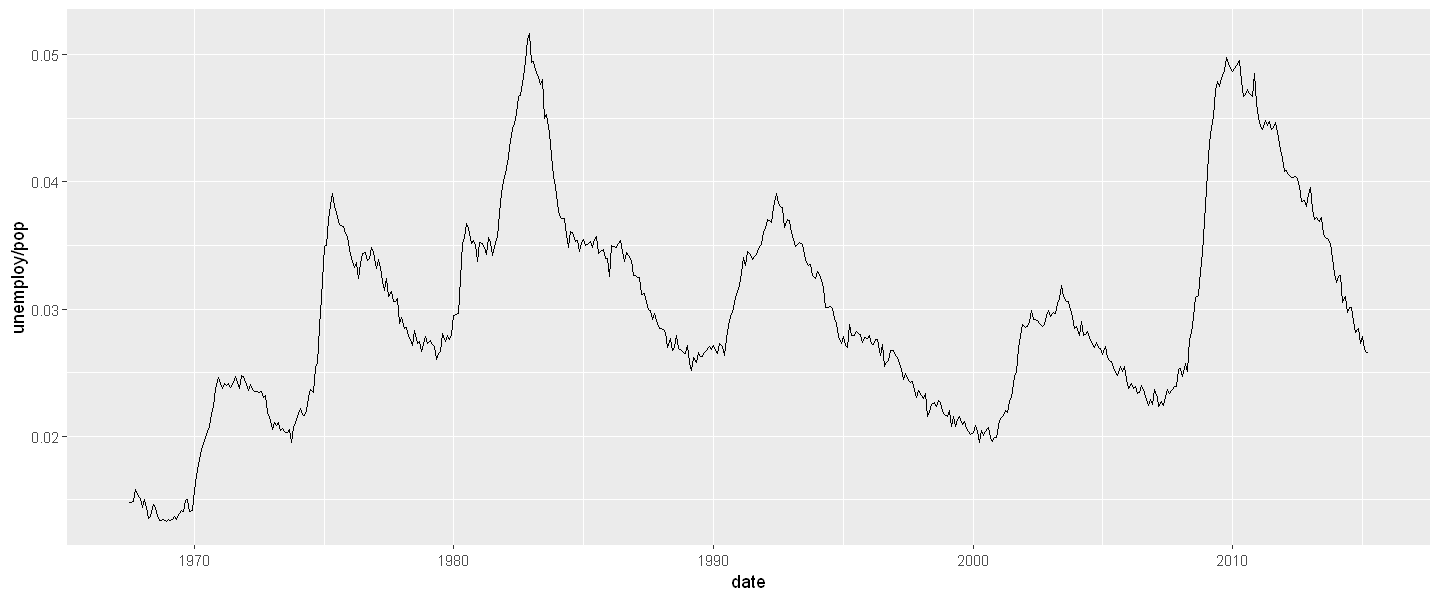

In [38]:
# Change the y-axis to the proportion of the population that is unemployed
ggplot(economics, aes( date,unemploy/pop)) +
  geom_line()

In [39]:
load("fish.RData")
str(fish.species)

'data.frame':	61 obs. of  8 variables:
 $ Year    : int  1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 ...
 $ Pink    : int  100600 259000 132600 235900 123400 244400 203400 270119 200798 200085 ...
 $ Chum    : int  139300 155900 113800 99800 148700 143700 158480 125377 132407 113114 ...
 $ Sockeye : int  64100 51200 58200 66100 83800 72000 84800 69676 100520 62472 ...
 $ Coho    : int  30500 40900 33600 32400 38300 45100 40000 39900 39200 32865 ...
 $ Rainbow : int  0 100 100 100 100 100 100 100 100 100 ...
 $ Chinook : int  23200 25500 24900 25300 24500 27700 25300 21200 20900 20335 ...
 $ Atlantic: int  10800 9701 9800 8800 9600 7800 8100 9000 8801 8700 ...


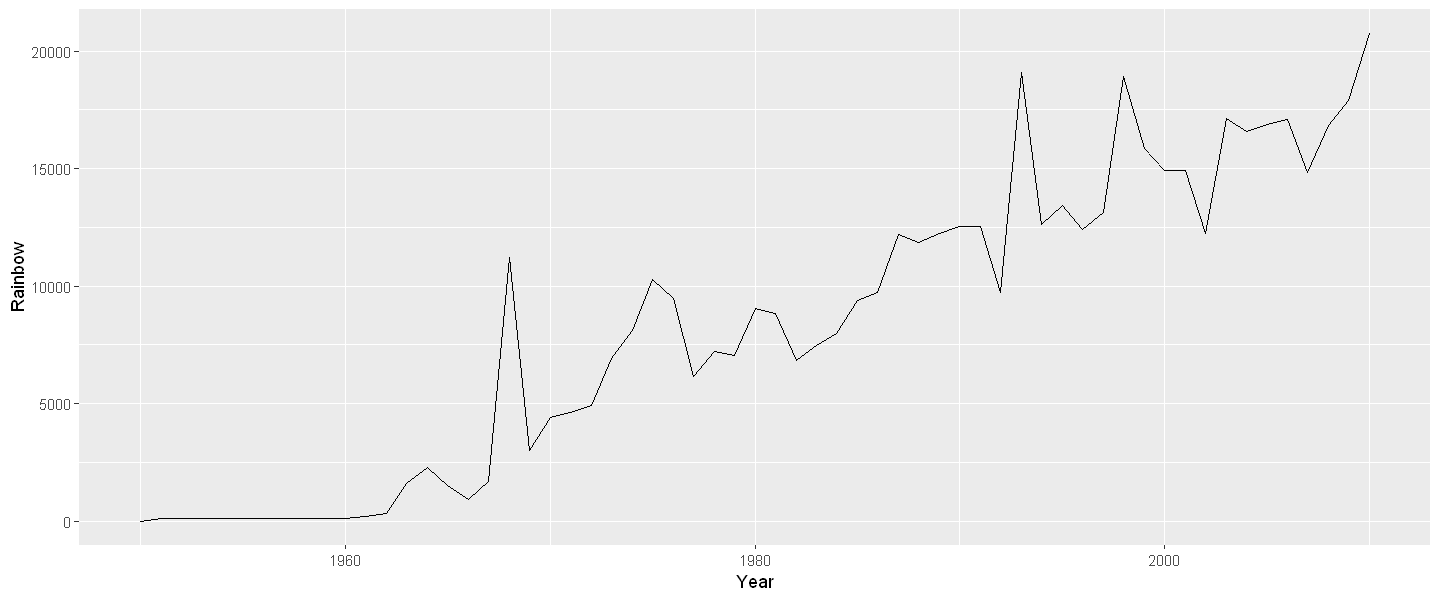

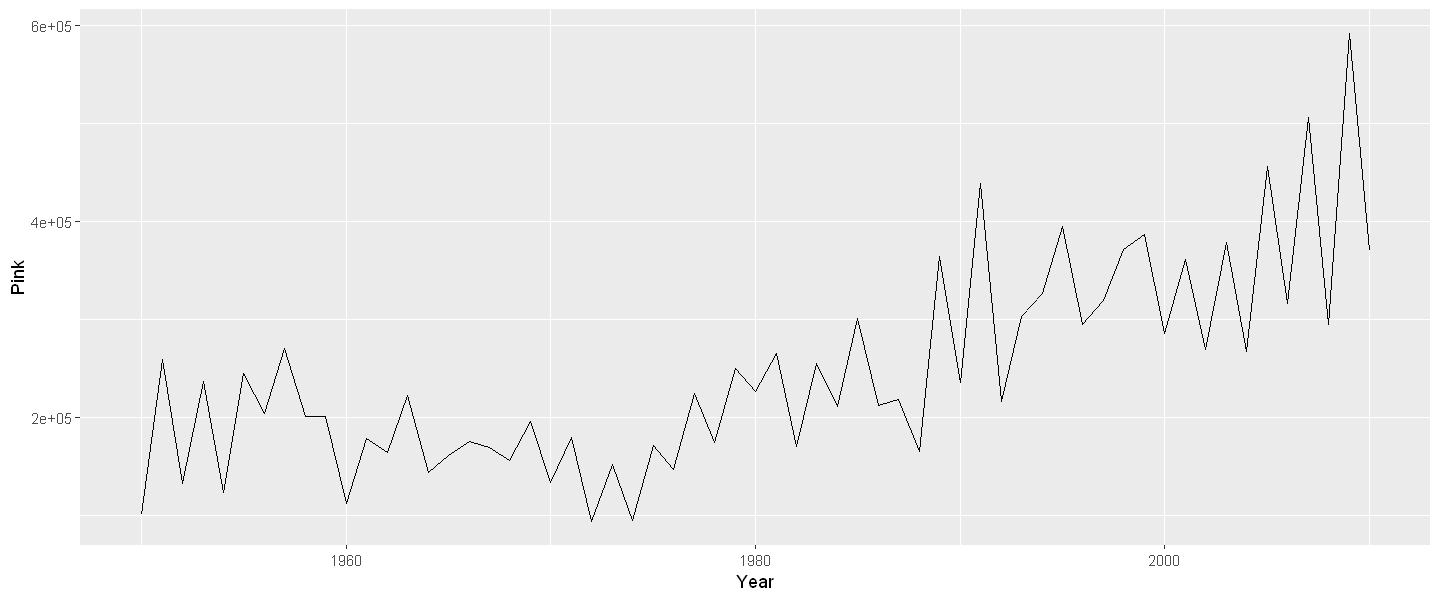

In [40]:
# Plot the Rainbow Salmon time series
ggplot(fish.species, aes(x = Year, y = Rainbow)) +
  geom_line()

# Plot the Pink Salmon time series
ggplot(fish.species, aes(x = Year, y = Pink)) +
  geom_line()



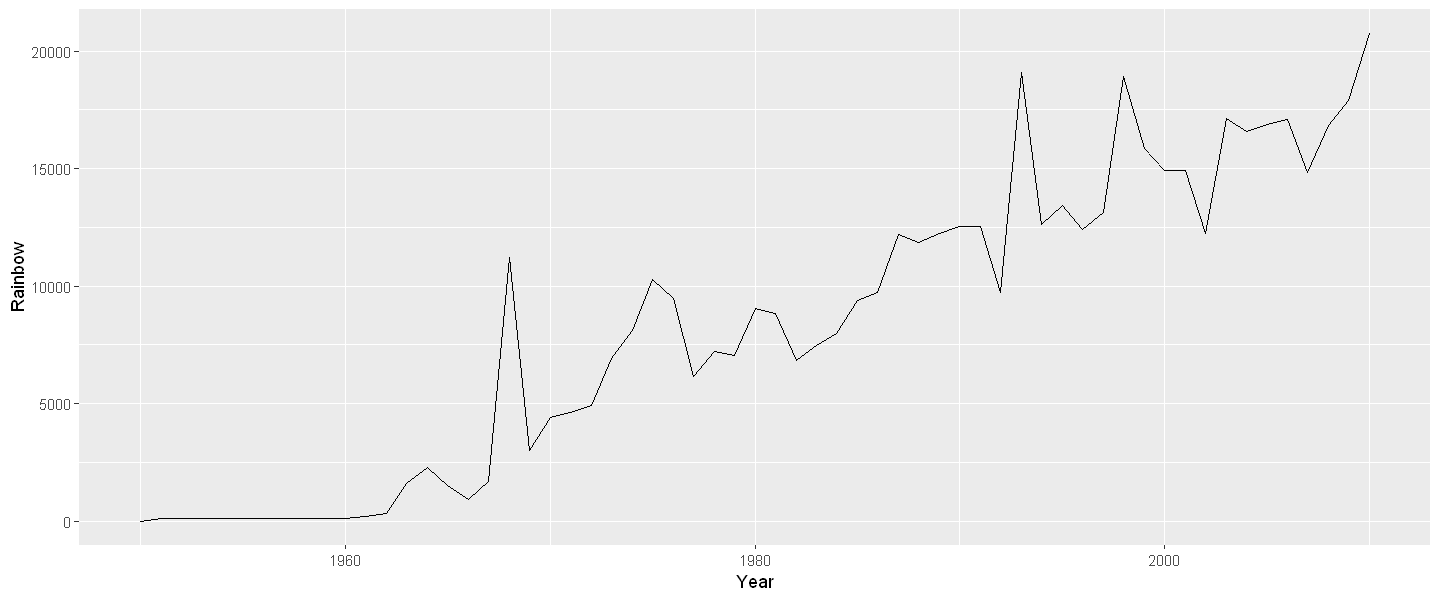

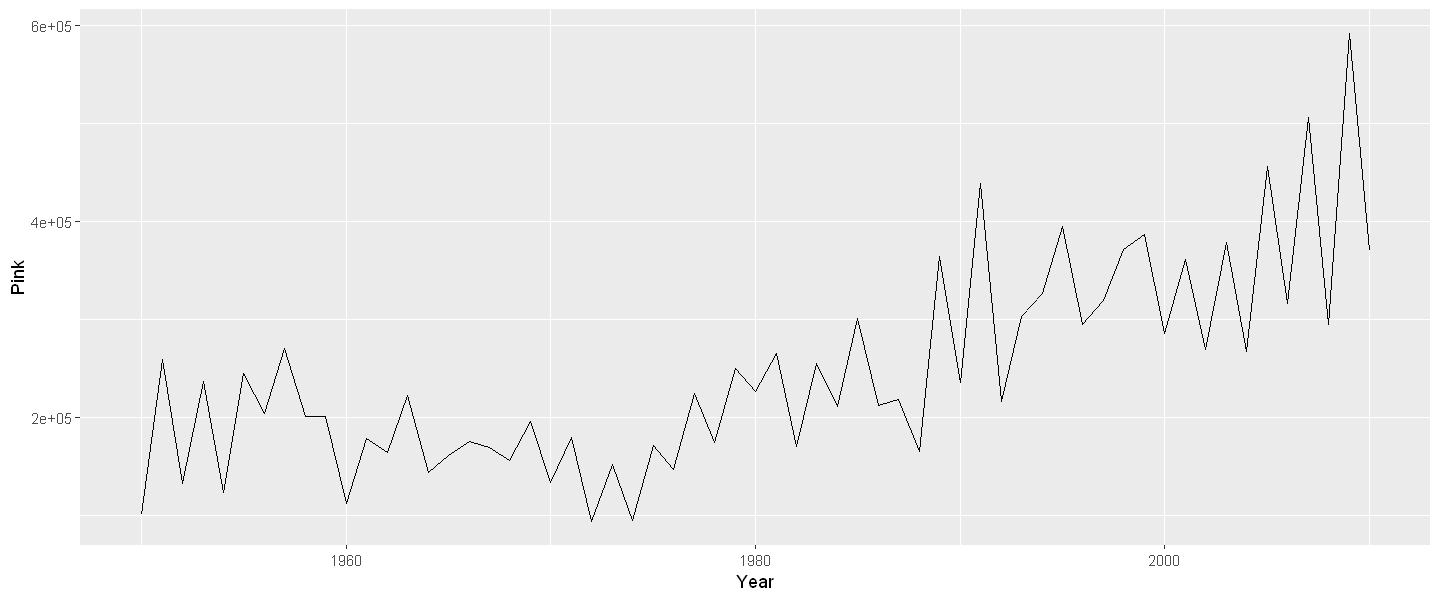

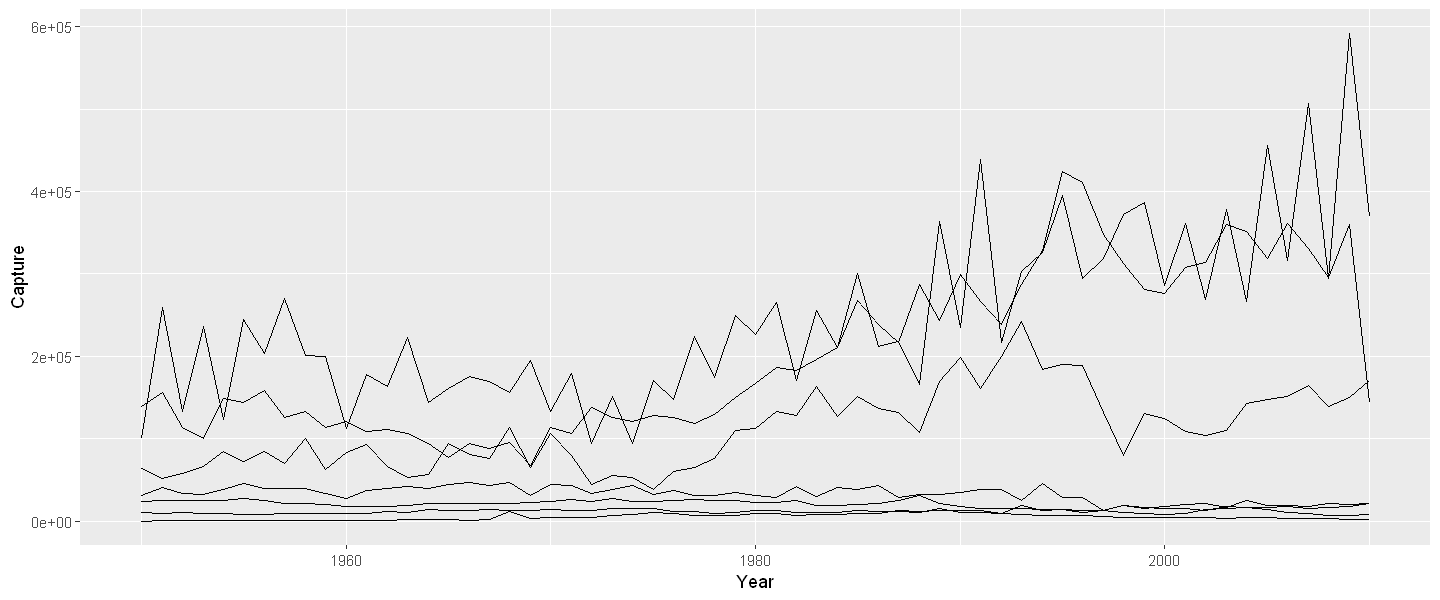

In [41]:
# Plot the Rainbow Salmon time series
ggplot(fish.species, aes(x = Year, y = Rainbow)) +
  geom_line()

# Plot the Pink Salmon time series
ggplot(fish.species, aes(x = Year, y = Pink)) +
  geom_line()

# Plot multiple time-series by grouping by species
ggplot(fish.tidy, aes(Year, Capture)) +
  geom_line(aes(group = Species))

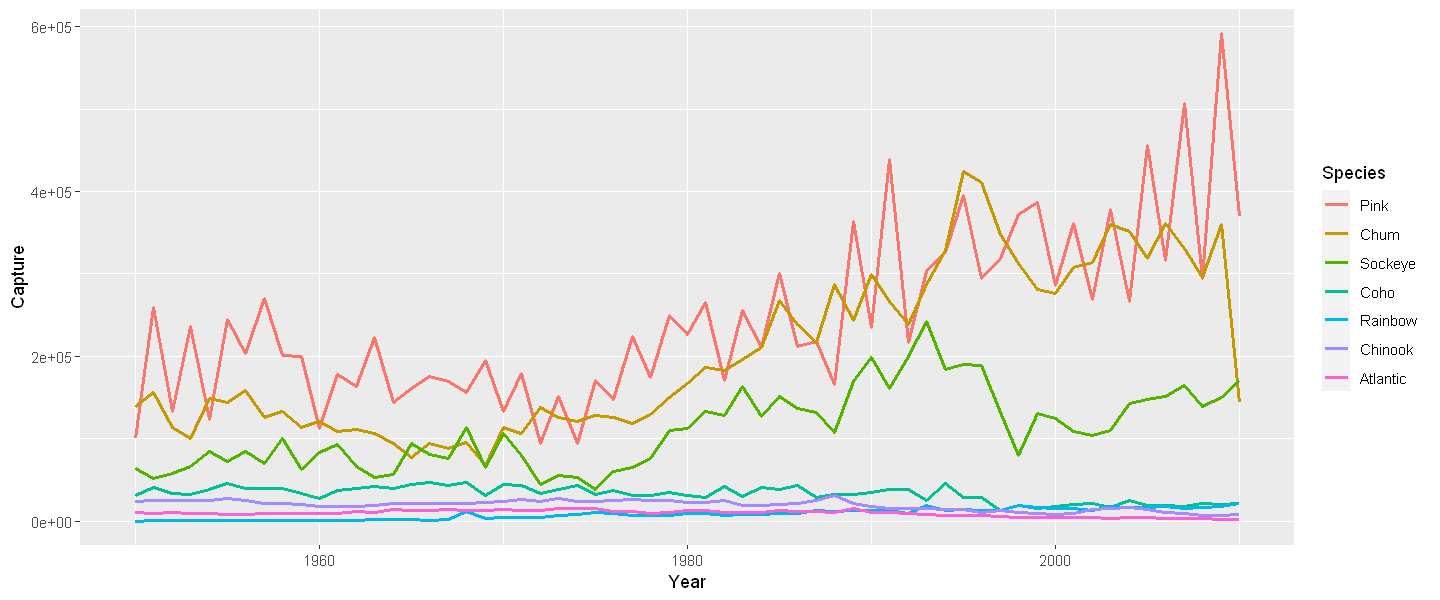

In [42]:
# Plot multiple time-series by coloring by species
ggplot(fish.tidy, aes(x = Year, y = Capture, color = Species )) +
  geom_line(aes(group = Species), size=1)

### 4. Themes
Dening theme objects
- Useful when you have many plots
- Provides consistency in style
- Apply a specic theme everywhere


In [43]:
head(recess)

ERROR: Error in head(recess): object 'recess' not found


In [ ]:
load("recess.RData")
names(recess) <- c("begin","end")
recess$begin <- as.Date(recess$begin, format = c("%d/%m/%Y"))
recess$end <- as.Date(recess$end, format = c("%d/%m/%Y"))

# Expand the following command with geom_rect() to draw the recess periods
ggplot(economics, aes(x = date, y = unemploy/pop)) +
  geom_rect(data = recess,
            aes(xmin = begin, xmax = end, ymin = -Inf, ymax = +Inf),
            inherit.aes = FALSE, fill = "red", alpha = 0.2) +
  geom_line()

### 5. Statistics

### Smoothing
- Practice on the layers (statistics, coordinates and facets)
- The mtcars dataset contains information for 32 cars from Motor Trends magazine from 1974 with a variety of continuous and categorical (both nominal and ordinal) variables.
- Explore statistics associated with specific geoms, for example, smoothing and lines.

**Using mtcars, draw a scatter plot of mpg vs. wt**

In [ ]:
ggplot(mtcars, aes(wt, mpg))+
geom_point()+
geom_smooth();

In [ ]:
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  geom_smooth(method='lm', se=FALSE)

In [ ]:
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE)

#### Grouping variables

- Considering the situation of looking at sub-groups in dataset. 
- Encounter the invisible group aesthetic.

In [ ]:
fcyl= factor(mtcars$cyl)
# Using mtcars, plot mpg vs. wt, colored by fcyl
ggplot(mtcars, aes(x=wt, y=mpg, color=fcyl)) +
  # Add a point layer
  geom_point() +
  # Add a smooth lin reg stat, no ribbon
  stat_smooth(method='lm',se=FALSE)

Update the plot to add a second smooth stat.
- Add a dummy `group` aesthetic to this layer, setting the value to `1`.
- Use the same `method` and `se` values as the first stat smooth layer.

In [ ]:
# Amend the plot to add another smooth layer with dummy grouping
ggplot(mtcars, aes(x = wt, y = mpg, color = fcyl)) +
  geom_point() +
  stat_smooth(method = "lm", se = FALSE) +
  stat_smooth(aes(group=1), method='lm', se=FALSE)

**Notice** that the color aesthetic defined an invisible group aesthetic. 
- Defining the group aesthetic for a specific geom means we can overwrite that. 
- Use a dummy variable to calculate the smoothing model for all values.

### Modifying stat_smooth
- Used se = FALSE in stat_smooth() to remove the 95% Confidence Interval. 
- Now consider another argument, span, used in LOESS smoothing, and take a look at a scenario of properly mapping different models.

Explore the effect of the span argument on LOESS curves. Add three smooth LOESS stats, each without the standard error ribbon.

In [ ]:
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  # Add 3 smooth LOESS stats, varying span & color
  stat_smooth(se = FALSE, color = 'red', span = 0.9) +
  stat_smooth(se = FALSE, color = 'green', span = 0.6) +
  stat_smooth(se = FALSE, color = 'blue', span = 0.3)

Compare LOESS and linear regression smoothing on small regions of data.

- Add a smooth LOESS stat, without the standard error ribbon.
- Add a smooth linear regression stat, again without the standard error ribbon.

In [ ]:
# Amend the plot to color by fcyl
ggplot(mtcars, aes(x = wt, y = mpg)) +
  geom_point() +
  # Add a smooth LOESS stat, no ribbon
  stat_smooth(se=FALSE) +
  # Add a smooth lin. reg. stat, no ribbon
  stat_smooth(method='lm', se=FALSE)

LOESS isn't great on very short sections of data; compare the pieces of linear regression to LOESS over the whole thing.

- Amend the smooth LOESS stat to map `color` to a dummy variable, `"All"`.

In [ ]:
# Amend the plot
ggplot(mtcars, aes(x = wt, y = mpg, color = fcyl)) +
  geom_point() +
  # Map color to dummy variable "All"
  stat_smooth(se = FALSE, aes(color='All')) +
  stat_smooth(method = "lm", se = FALSE)
  

- take a look at the standard error ribbons, which show the 95% confidence interval of smoothing models. 
- `Vocab` dataset has been given an extra column, year_group, splitting the dates into before and after 1995.

In [ ]:
library(data.table)
library(car)
library(dplyr)
Vocab <- Vocab %>% mutate(year_group = case_when(year <1995 ~ '1974-1995', year >1995 ~ '1995-2016'))

In [ ]:
ggplot(Vocab, aes(education,  vocabulary, color=year_group)) +
  # Add jittered poyints with transparency 0.25
  geom_jitter(alpha=0.25) +
  # Add a smooth lin. reg. line (with ribbon)
  stat_smooth(method='lm')

In [ ]:

ggplot(Vocab, aes(x = education, y = vocabulary, color = year_group)) +
geom_jitter(alpha = 0.25) +
# Map the fill color to year_group, set the line size to 2
stat_smooth(method = "lm", aes(fill=year_group), size=3)

### Quantiles
- Use stat_quantile() to apply a quantile regression.
- Linear regression predicts the mean response from the explanatory variables, quantile regression predicts a quantile response (e.g. the median) from the explanatory variables. Specific quantiles can be specified with the quantiles argument.


In [ ]:
ggplot(Vocab, aes(x = education, y = vocabulary)) +
  geom_jitter(alpha = 0.25) +
  # Add a quantile stat, at 0.05, 0.5, and 0.95
  stat_quantile(quantiles=c(0.05,0.5,0.95))

In [ ]:
# Amend the plot to color by year_group
ggplot(Vocab, aes(x = education, y = vocabulary, color=year_group)) +
  geom_jitter(alpha = 0.25) +
  stat_quantile(quantiles = c(0.05, 0.5, 0.95), aes(color=year_group))

### Using stat_sum

In the Vocab dataset, education and vocabulary are integer variables. 
- This is one of the four causes of overplotting, a single point at each intersection between the two variables.
    - One solution is using `jitter`ing with transparency. 
    - Another solution is to use `stat_sum()`, which calculates the total number of overlapping observations and maps that onto the size aesthetic.

- stat_sum() allows a special variable, `..prop..`, to show the proportion of values within the dataset.

In [ ]:
# Run this, look at the plot, then update it
ggplot(Vocab, aes(x = education, y = vocabulary)) +
  # sum stat with alpha =0.5
    stat_sum(alpha = 0.5)+
  # Add a size scale, from 1 to 10
    scale_size(range=c(1,10))


In [ ]:
# Run this, look at the plot, then update it

ggplot(Vocab, aes(x = education, y = vocabulary)) +
  # sum stat with setting size to ..prop.. so circle size represents the proportion of the whole dataset.
    stat_sum(aes(size = ..prop..))


In [ ]:
# Amend the plot to group by education
ggplot(Vocab, aes(x = education, y = vocabulary, group = education)) +
  stat_sum(aes(size = ..prop..))

## Stats outside `geoms`
Establishing these items as independent objects will allow us to recycle them easily in many layers, or plots.

- `position_jitter()` adds jittering (e.g. for points).
- `position_dodge()` dodges geoms, (e.g. bar, col, boxplot, violin, errorbar, pointrange).
- `position_jitterdodge()` jitters and dodges geoms, (e.g. points).

Use mtcars, where fcyl and fam are proper factor variables of the original cyl and am variables.



In [ ]:
# Define position objects
# 1. Jitter with width 0.2
posn_j <- position_jitter(width=0.2)

# 2. Dodge with width 0.1
posn_d <- position_dodge(width=0.1)

# 3. Jitter-dodge with jitter.width 0.2 and dodge.width 0.1
posn_jd <- position_jitterdodge(jitter.width = 0.2, dodge.width = 0.1)

In [ ]:
fam= factor(mtcars$am)
# From previous step
posn_j <- position_jitter(width = 0.2)
posn_d <- position_dodge(width = 0.1)
posn_jd <- position_jitterdodge(jitter.width = 0.2, dodge.width = 0.1)

# Create the plot base: wt vs. fcyl, colored by fam
p_wt_vs_fcyl_by_fam <- ggplot(mtcars, aes(x=fcyl, y=wt, color=fam))

# Add a point layer
p_wt_vs_fcyl_by_fam +
  geom_point()

In [ ]:
p_wt_vs_fcyl_by_fam +
  geom_point(position=posn_j)

In [ ]:
# Add dodging only
p_wt_vs_fcyl_by_fam +
  geom_point(position=posn_d)

In [ ]:
# Add jittering and dodging
p_wt_vs_fcyl_by_fam +
  geom_point(position=posn_jd)

### Plotting variations

Summary statistics refers to a combination of location (mean or median) and spread (standard deviation or confidence interval).

These metrics are calculated in `stat_summary()` by passing a function to the `fun.data` argument. `mean_sdl()`, calculates multiples of the standard deviation and `mean_cl_normal()` calculates the t-corrected 95% CI.

Arguments to the data function are passed to `stat_summary()`'s `fun.args` argument as a list.



In [ ]:
library('Hmisc')

In [ ]:

p_wt_vs_fcyl_by_fam_jit <- p_wt_vs_fcyl_by_fam +
  geom_point(position=posn_d)

p_wt_vs_fcyl_by_fam_jit +
  # Add a summary stat of std deviation limits
  stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), position = posn_d)

In [ ]:
p_wt_vs_fcyl_by_fam_jit +
  # Change the geom to be an errorbar
  stat_summary(fun.data = mean_sdl, fun.args = list(mult = 1), position = posn_d, geom='errorbar')

In [ ]:
p_wt_vs_fcyl_by_fam_jit +
  # Add a summary stat of normal confidence limits
  stat_summary(fun.data = mean_cl_normal, position = posn_d)

## 6. Coordinates

### Zooming In
- Using the coordinates layer to zoom in, for example, by changing scales and by changing coordinates.
- The big difference is that the scale functions change the underlying dataset, which affects calculations made by computed geoms (like histograms or smooth trend lines), whereas coordinate functions make no changes to the dataset.



In [ ]:
# Run the code, view the plot, then update it
ggplot(mtcars, aes(x = wt, y = hp, color = fam)) +
  geom_point() +
  geom_smooth() +
  # Add a continuous x scale from 3 to 6
  scale_x_continuous(limits=c(3,6))

> **Causing Problem**

- =>Update the plot by adding a Cartesian coordinate system with x limits, xlim, from 3 to 6.

In [ ]:
ggplot(mtcars, aes(x = wt, y = hp, color = fam)) +
  geom_point() +
  geom_smooth() +
  # Add Cartesian coordinates with x limits from 3 to 6
coord_cartesian(xlim = c(3,6))

> Using the scale function to zoom in meant that there wasn't enough data to calculate the trend line, and `geom_smooth()` failed. When `coord_cartesian()` was applied, the full dataset was used for the trend calculation.

### Aspect ratio I: 1:1 ratios
- Set the aspect ratio of a plot with coord_fixed(), which uses ratio = 1 as a default. A 1:1 aspect ratio is most appropriate when two continuous variables are on the same scale, as with the iris dataset.

- All variables are measured in centimeters, so it only makes sense that one unit on the plot should be the same physical distance on each axis. This gives a more truthful depiction of the relationship between the two variables since the aspect ratio can change the angle of our smoothing line. This would give an erroneous impression of the data. Of course the underlying linear models don't change, but our perception can be influenced by the angle drawn.


In [ ]:
ggplot(iris, aes(x = Sepal.Length, y = Sepal.Width, color = Species)) +
  geom_jitter() +
  geom_smooth(method = "lm", se = FALSE) +
  # Fix the coordinate ratio
  coord_fixed() 

### Aspect ratio II: setting ratios

When values are not on the same scale it can be a bit tricky to set an appropriate aspect ratio. A classic William Cleveland (inventor of dot plots) example is the `sunspots` data set. We have 3200 observations from 1750 to 2016.

`sun_plot` is a plot without any set aspect ratio. It fills up the graphics device.

To make aspect ratios clear, we've drawn an orange box that is 75 units high and 75 years wide. Using a 1:1 aspect ratio would make the box square. That aspect ratio would make things harder to see the oscillations: it is better to force a wider ratio.

In [ ]:
library(zoo)


In [ ]:
sunspots.m <- data.frame(    
    year = index(sunspot.month),    
    value = reshape2::melt(sunspot.month)$value)

ggplot(sunspots.m, aes(x = year, y = value)) +  geom_line() +  coord_fixed()

In [ ]:
ggplot(sunspots.m, aes(x = year, y = value)) +  geom_line() +  coord_fixed(0.35)


### Expand and clip
The coord_\*() layer functions offer two useful arguments that work well together: `expand` and `clip`.

- expand sets a buffer margin around the plot, so data and axes don't overlap. Setting expand to 0 draws the axes to the limits of the data.
- clip decides whether plot elements that would lie outside the plot panel are displayed or ignored ("clipped").

**Add Cartesian coordinates with zero expansion, to remove all buffer margins on both the x and y axes.**


In [ ]:
ggplot(mtcars, aes(wt, mpg)) +
  geom_point(size = 2) +
  # Add Cartesian coordinates with zero expansion
  coord_cartesian(expand=0) +
  theme_classic()

Setting `expand` to 0 caused points at the edge of the plot panel to be cut off.

- Set the `clip` argument to `"off"` to prevent this.
- Remove the axis lines by setting the `axis.line` argument to `element_blank()` in the `theme()` layer function.

In [ ]:
ggplot(mtcars, aes(wt, mpg)) +
  geom_point(size = 2) +
  # Turn clipping off
  coord_cartesian(expand = 0, clip="off") +
  theme_classic() +
  # Remove axis lines
  theme(axis.line=element_blank())

### Log-transforming scales
Using `scale_y_log10()` and `scale_x_log10()` is equivalent to transforming our actual dataset before getting to `ggplot2`.

Using `coord_trans()`, setting `x = "log10"` and/or `y = "log10"` arguments, transforms the data after statistics have been calculated. The plot will look the same as with using `scale_*_log10()`, but the scales will be different, meaning that we'll see the original values on our `log10` transformed axes. This can be useful since log scales can be somewhat unintuitive.

`sleep` dataset: the brain and body weight of 51 mammals

In [ ]:
# Produce a scatter plot of brainwt vs. bodywt
ggplot(msleep, aes(bodywt, brainwt)) +
  geom_point() +
  ggtitle("Raw Values")

In [ ]:
# Add scale_*_*() functions
ggplot(msleep, aes(bodywt, brainwt)) +
  geom_point() +
  scale_x_log10() +
  scale_y_log10() +
  ggtitle("Scale_ functions")

In [ ]:
# Perform a log10 coordinate system transformation
ggplot(msleep, aes(bodywt, brainwt)) +
  geom_point() +
  coord_trans(x="log10", y="log10")

### Adding stats to transformed scales

Remember that statistics are calculated on the untransformed data. A linear model may end up looking not-so-linear after an axis transformation. Let's revisit the two plots from the previous exercise and compare their linear models.

In [ ]:
# Plot with a scale_*_*() function:
ggplot(msleep, aes(bodywt, brainwt)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  # Add a log10 x scale
  scale_x_log10() +
  # Add a log10 y scale
  scale_y_log10() +
  ggtitle("Scale functions")

In [ ]:
# Plot with transformed coordinates
ggplot(msleep, aes(bodywt, brainwt)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  # Add a log10 coordinate transformation for x and y axes
  coord_trans(x='log10', y='log10')

In [ ]:
# Add scale_*_*() functions
ggplot(msleep, aes(bodywt, brainwt)) +
  geom_point() +
  scale_x_log10() +
  scale_y_log10() +
  ggtitle("Scale_ functions")

### Useful double axes
Double x and y-axes are a contentious topic in data visualization. The two axes are the raw temperature values on a Fahrenheit scale and the transformed values on a Celsius scale.

A scale that is unintuitive for many people can be made easier by adding a transformation as a double axis.

In [ ]:
airquality$Date <- as.Date(paste("1973", airquality$Month, airquality$Day, sep="-"))
str(airquality)

In [ ]:

# Using airquality, plot Temp vs. Date
ggplot(airquality, aes(x=Date, y= Temp)) +
  # Add a line layer
  geom_line() +
  labs(x = "Day (1973)", y = "Fahrenheit")

In [ ]:
# Define breaks (Fahrenheit)
y_breaks <- c(59, 68, 77, 86, 95, 104)

# Convert y_breaks from Fahrenheit to Celsius
y_labels <- (y_breaks-32)*5/9

# Create a secondary x-axis
secondary_y_axis <- sec_axis(
  # Use identity transformation
  trans = identity,
  name = "Celsius",
  # Define breaks and labels as above
  breaks = y_breaks,
  label=y_labels
)

# Examine the object
secondary_y_axis

In [ ]:
# From previous step
y_breaks <- c(59, 68, 77, 86, 95, 104)
y_labels <- (y_breaks - 32) * 5 / 9
secondary_y_axis <- sec_axis(
  trans = identity,
  name = "Celsius",
  breaks = y_breaks,
  labels = y_labels
)

# Update the plot
ggplot(airquality, aes(Date, Temp)) +
  geom_line() +
  # Add the secondary y-axis 
  scale_y_continuous(sec.axis=secondary_y_axis) +
  labs(x = "Date (1973)", y = "Fahrenheit")

### Flipping axes I
Flipping axes means to reverse the variables mapped onto the x and y aesthetics. We can just change the mappings in aes(), but => use the `coord_flip()` layer function.

There are two reasons to use this function:

- a vertical geom to be horizontal, or
- a long series of plotting functions and want to flip it without having to rewrite all our commands.

In [ ]:
# Plot fcyl bars, filled by fam
ggplot(mtcars, aes(x=fcyl, fill = fam)) +
  # Place bars side by side
  geom_bar(position = "dodge")

In [ ]:
ggplot(mtcars, aes(fcyl, fill = fam)) +
  geom_bar(position = "dodge") +
  # Flip the x and y coordinates
  coord_flip()

In [ ]:
ggplot(mtcars, aes(fcyl, fill = fam)) +
  # Set a dodge width of 0.5 for partially overlapping bars
  geom_bar(position = position_dodge(width=0.5)) +
  coord_flip()

In [ ]:
mtcars

In [ ]:
library(data.table)

In [ ]:
mtcars <- data.table(Car = rownames(mtcars), mtcars)
# Plot of wt vs. car
ggplot(mtcars, aes(Car, wt)) +
  # Add a point layer
  geom_point() +
  labs(x = "car", y = "weight")

In [ ]:
# Flip the axes to set car to the y axis
ggplot(mtcars, aes(Car, wt)) +
  geom_point() +
  labs(x = "car", y = "weight") +
  coord_flip()

In [ ]:
# Add scale_*_*() functions
ggplot(msleep, aes(bodywt, brainwt)) +
  geom_point() +
  scale_x_log10() +
  scale_y_log10() +
  ggtitle("Scale_ functions")

### Pie charts

In [ ]:
# Run the code, view the plot, then update it
ggplot(mtcars, aes(x = 1, fill = fcyl)) +
  geom_bar()+
  # Add a polar coordinate system
  coord_polar(theta='y'  )

In [ ]:
ggplot(mtcars, aes(x = 1, fill = fcyl)) +
  # Reduce the bar width to 0.1
  geom_bar(width=0.1) +
  coord_polar(theta = "y") +
  # Add a continuous x scale from 0.5 to 1.5
  scale_x_continuous(limits = c(0.5,1.5))

### Wind rose plots

In [ ]:
library(openair)

In [ ]:
# Using wind, plot wd filled by ws
ggplot(wind, aes(wd,fill=ws)) +
  # Add a bar layer with width 1
  geom_bar(width=1)

### 7. Facets

### 8. Best Practices
